<a href="https://colab.research.google.com/github/neuromatch/NeuroAI_Course/blob/main/projects/project-notebooks/ComparingNetworks.ipynb" target="_blank"><img alt="Open In Colab" src="https://colab.research.google.com/assets/colab-badge.svg"/></a>   <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/neuromatch/NeuroAI_Course/main/projects/project-notebooks/ComparingNetworks.ipynb" target="_blank"><img alt="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"/></a>



# Comparing networks

***Comparing networks: Characterizing computational similarity in task-trained recurrent neural networks***

**By Neuromatch Academy**


__Content creators:__ Chris Versteeg

__Content reviewers:__ Chris Versteeg, Hannah Choi, Eva Dyer

__Production editors:__ Konstantine Tsafatinos, Ella Batty, Spiros Chavlis, Samuele Bolotta, Hlib Solodzhuk

---


## Background

Researchers training artificial networks to perform tasks (e.g., image classification, motor control) have found that the activity in the artificial networks can resemble the activity of biological neurons from brain areas thought to perform similar tasks. Unfortunately, it is unclear whether a superficial similarity in neural activation necessarily translates to a conserved computational strategy. We need ways to assess how well different models are able to capture the computational principles, which will require datasets where the ground-truth computations are known, and we can analyze the similarity between artificial and natural systems. The aim of this project is to explore ways to measure alignment in dynamical systems, and to study different approaches to quantify the changes in representations across different tasks and across different architectures.

###  Install and import feedback gadget


# @title Install and import feedback gadget

!pip install vibecheck datatops --quiet



###  Project Background


# @title Project Background

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'KpXu34cvWPE'), ('Bilibili', 'BV1qJ4m1g7nR')]
tab_contents = display_videos(video_ids, W=730, H=410)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

###  Submit your feedback


###  Project slides


# @title Project slides

from IPython.display import IFrame
print("If you want to download the slides: https://osf.io/download/vb3tw/")
IFrame(src="https://mfr.ca-1.osf.io/render?url=https://osf.io/download/vb3tw/?direct%26mode=render", width=854, height=480)

###  Project Template


In [13]:
#@title Project Template
from IPython.display import Image, display
import os
from pathlib import Path

url = "https://github.com/neuromatch/NeuroAI_Course/blob/main/projects/project-notebooks/static/ComputationalSimilarityTemplate.png?raw=true"

display(Image(url=url))

###  Submit your feedback


**Tutorial links**

 This project is mostly associated with the materials presented in [**W1D3**](https://neuroai.neuromatch.io/tutorials/W1D3_ComparingArtificialAndBiologicalNetworks/student/W1D3_Intro.html), on comparing activities of artificial and biological networks. One of the main techniques here, DSA, completes and empowers your toolbox by enabling dynamic analysis of activity patterns. You will find the [Tutorial 2](https://neuroai.neuromatch.io/tutorials/W1D1_Generalization/student/W1D1_Tutorial2.html) from the **W1D1** the most similar by the model's architecture and the idea of goal-oriented networks.

---
## Section 1: Preparing the environment

**IF USING COLAB // KAGGLE**:

Uncomment the lines of code below and run them in order. The top, the second, and the last cells only need to be run once, but **the third cells (envStr) need to be re-run if the Colab // Kaggle notebook crashes**. These blocks install the needed dependencies and set up your environment. Notice that the first and third cell contents depend on whether you use Colab or Kaggle.

⏳⏳⏳

 Colab // Kaggle installation (Part 1)


In [18]:
# @markdown Colab // Kaggle installation (Part 1)

# ! git clone https://github.com/neuromatch/ComputationThruDynamicsBenchmark
# %cd ComputationThruDynamicsBenchmark
# ! pip install -e .

## RUN THIS CELL, THEN RESTART SESSION AS PROMPTED (BUTTON AT BOTTOM OF THIS CELL'S FINISHED OUTPUT). DO NOT NEED TO RUN AGAIN
## PLEASE RESTART THE ENVIRONMENT FOR KAGGLE MANUALLY (Run > Restart & clear cell outputs)

 Colab // Kaggle installation (Part 2)


In [20]:
# @markdown Colab // Kaggle installation (Part 2)

# !pip uninstall -y torchaudio torchvision

 Colab // Kaggle installation (Part 3)


In [22]:
# @markdown Colab // Kaggle installation (Part 3)

## GET BACK TO THE DIRECTORY AND CONFIGURE .env

################ COLAB #####################

# %cd /content/ComputationThruDynamicsBenchmark/
# envStr = """HOME_DIR=/content/ComputationThruDynamicsBenchmark/
# #Don't change these
# TRAIN_INPUT_FILE=train_input.h5\nEVAL_INPUT_FILE=eval_input.h5
# EVAL_TARGET_FILE=eval_target.h5
# """

#############################################

################ KAGGLE #####################

# %cd /kaggle/working/ComputationThruDynamicsBenchmark/
# envStr = """HOME_DIR=/kaggle/working/ComputationThruDynamicsBenchmark/
# #Don't change these
# TRAIN_INPUT_FILE=train_input.h5\nEVAL_INPUT_FILE=eval_input.h5
# EVAL_TARGET_FILE=eval_target.h5
# """

##############################################

################ COLAB // KAGGLE #####################

# with open('.env','w') as f:
#   f.write(envStr)

##############################################

 Colab // Kaggle installation (Part 4)


# @markdown Colab // Kaggle installation (Part 4)

!git clone https://github.com/mitchellostrow/DSA
%cd DSA/
!pip install -e .

**IF RUNNING LOCALLY**:

Follow the instructions [here](https://github.com/snel-repo/ComputationThruDynamicsBenchmark) to setup the separate environment for this project, or you can run the cell below for general installment.

 Local installation


In [27]:
# @markdown Local installation

import contextlib
import io
import os

dirname = "ComputationThruDynamicsBenchmark"

#with contextlib.redirect_stdout(io.StringIO()): #to suppress output
#    if not os.path.isdir(dirname):
#        ! git clone https://github.com/neuromatch/ComputationThruDynamicsBenchmark
#       %cd ComputationThruDynamicsBenchmark
#     ! pip install -e .

envStr = """HOME_DIR=ComputationThruDynamicsBenchmark/


#Don't change these
TRAIN_INPUT_FILE=train_input.h5\nEVAL_INPUT_FILE=eval_input.h5
EVAL_TARGET_FILE=eval_target.h5
"""

#! git clone https://github.com/neuromatch/ComputationThruDynamicsBenchmark
#%cd ComputationThruDynamicsBenchmark
#! pip install -e .

with open('.env','w') as f:
  f.write(envStr)

###  Submit your feedback


---
## Section 2: Overview of the available tasks

First, let's take a high-level look at the tasks that we are going to use to understand computation in artificial networks!

We'll start by loading in some packages.

In [30]:
# set the random seed for reproducibility
import random
import dotenv
import pathlib
import os
import logging

# comment the next three lines if you want to see all training logs
pl_loggers = [logging.getLogger(name) for name in logging.root.manager.loggerDict if 'pytorch_lightning' in name]
for pl_log in pl_loggers:
    logging.getLogger(pl_log.name).setLevel(logging.WARNING)

random.seed(2024)

dotenv.load_dotenv(override=True)
HOME_DIR = os.getenv("HOME_DIR")
if HOME_DIR is None:
    HOME_DIR = ""
print(HOME_DIR)

ComputationThruDynamicsBenchmark/


The Computation-Thru-Dynamics Benchmark has three distinct behavioral tasks.

These tasks are called:
1. Three-Bit Flip-Flop (3BFF) (see [Sussillo & Barak 2013](https://pubmed.ncbi.nlm.nih.gov/23272922/))
2. MultiTask (See [Driscoll et al. 2023](https://www.biorxiv.org/content/10.1101/2022.08.15.503870v1.full.pdf))
3. RandomTarget (See [Codol et al. 2023](https://elifesciences.org/reviewed-preprints/88591v2/reviews))

We chose these tasks because they represent a variety of task complexities. We have a pretty good understanding of how the simpler tasks operate (3BFF), but really are only starting to scratch the surface of more complex tasks (RandomTarget).

Specificially, in the Random Target task, the actions that the model takes can affect the future inputs, making it an important test case for being able to understand the dynamics of interacting systems!

<img src="https://github.com/neuromatch/NeuroAI_Course/blob/main/projects/project-notebooks/static/TaskComplexity-01.png?raw=true" width="600"/>

Each task (which we call a "task environment") follows a standardized format that allows alternative task environments to be incorporated without any changes to the training pipeline.

Here, we'll take a walk through the two tasks in the project template (TBFF and RandomTarget) and inspect the behavior of networks trained in these environments.

###  Submit your feedback


---
## Section 3: Understanding the Three-Bit Flip-Flop task (3BFF)

We're going to start out with the task that launched a thousand Nature papers, the 3-Bit Flip-Flop. [Sussillo & Barak 2013](https://pubmed.ncbi.nlm.nih.gov/23272922/) used the three-bit flip-flop in their seminal attempts to understand how dynamics can give rise to computation! 

The code snippet below instantiates a "TaskEnv" object, which contains the logic for the NBFF task.


❓❓❓

The default parameters are shown in `./interpretability/task_modeling/configs/env_task/NBFF.yaml`, but try changing the parameters below to see how that affects trials generated from the environment. Note that this task is modular in the number of bits as well, so it provides an easy way to scale the dimensionality of a very simple dynamical system.

❓❓❓

from ctd.task_modeling.task_env.task_env import NBitFlipFlop

n = 3 # The number of bits in the flip-flop (default: 3)
trial_length = 500 # The number of time steps in each trial (default: 500)
switch_prob = 0.015 # The probability of an input pulse (default: 0.015 pulses/channel / time step)
noise = 0.15 # The standard deviation of the Gaussian noise added to the input (default: 0.15)

# This line creates the NBitFlipFlop environment. See ctd.task_modeling.task_env.task_env.NBitFlipFlop for more information.
env_3bff = NBitFlipFlop(
    n = n,
    n_timesteps=trial_length,
    switch_prob=switch_prob,
    noise=noise
    )

# Renders a random trial from the environment
env_3bff.render()

Above, we are plotting the inputs and outputs of the 3BFF task. One trial is 500 time steps, each with a 1% probability of getting an "up" or "down" pulse on each of its 3 input channels. When the task receives an "up" pulse, the state corresponding to that input channel moves from zero to one (if possible), and if a state at one receives a "down" pulse, it goes to zero. In this way, this system acts as 3 bits of memory, encoding 8 potential system states (2^3 states). We add noise to the inputs of the system so that it better reflects realistic computations that a neural circuit might perform.


**Try changing the parameters of your 3BFF environment to see how the behavior changes!**

Another way to visualize this is to view the three states in 3D. Below, you can see that the 8 potential states appear as the vertices of a cube. Each trial is plotted as a column. 

env_3bff.render_3d(n_trials=6)

Now that we can see the basic logic of the task, let's do a basic overview of what task training is!

<img src="https://github.com/neuromatch/NeuroAI_Course/blob/main/projects/project-notebooks/static/TTModelExample-01.png?raw=true" width="600"/>

For task-training, we are simply training a model (e.g., an RNN) to produce a set of outputs given a set of inputs. This input/output relationship defines the task that the model is performing. In the case of 3BFF, an input pulse should cause the model's output to change in a way that reflects the switching of a bit. 

**3BFF Training Objective:**

3BFF models are trained to minimize the MSE between the desired output and the output of the model, with some other components that pressure the solution to be smooth. If you're interested in the specifics, the implementation of the loss function can be found as the NBFFLoss object in `ctd/task_modeling/task_env/loss_func.py`.

###  Submit your feedback



## Section 4: Training a model to perform 3BFF

For this tutorial, we are using PyTorch Lightning to abstract much of the engineering away, allowing you to focus your full attention on the scientific questions you want to tackle!

This segment takes around 8 minutes to train, so I'd recommend planning your runs accordingly!

⏳⏳⏳

The cell below will create a recurrent neural network (RNN) model and use the 3BFF environment to generate samples on which the model will be trained!

Unfortunately, it generates a lot of output, so if you don't care to see the model progress, set `enable_progress_bar` to False below.

from ctd.task_modeling.model.rnn import GRU_RNN
from ctd.task_modeling.datamodule.task_datamodule import TaskDataModule
from ctd.task_modeling.task_wrapper.task_wrapper import TaskTrainedWrapper
from pytorch_lightning import Trainer

enable_progress_bar = False

# Step 1: Instantiate the model
rnn = GRU_RNN(latent_size = 128) # Look in ctd/task_modeling/models for alternative choices!

# Step 2: Instantiate the task environment
task_env = env_3bff

# Step 3: Instantiate the task datamodule
task_datamodule = TaskDataModule(task_env, n_samples = 1000, batch_size = 1000)

# Step 4: Instantiate the task wrapper
task_wrapper = TaskTrainedWrapper(learning_rate=1e-3, weight_decay = 1e-8)

# Step 5: Initialize the model with the input and output sizes (3 inputs, 3 outputs, in this case)
rnn.init_model(
    input_size = task_env.observation_space.shape[0],
    output_size = task_env.action_space.shape[0]
    )

# Step 6:  Set the environment and model in the task wrapper
task_wrapper.set_environment(task_env)
task_wrapper.set_model(rnn)

# Step 7: Define the PyTorch Lightning Trainer object
trainer = Trainer(max_epochs=500, enable_progress_bar=enable_progress_bar)

# Step 8: Fit the model
trainer.fit(task_wrapper, task_datamodule)

Now, we use `pickle` to save the trained model and datamodule for future analyses!

❓❓❓

**Once you get this model trained, feel free to try changing the hyperparameters to see if you can get the model to train faster!**

❓❓❓

import pickle
# save model as .pkl
save_dir = pathlib.Path(HOME_DIR) / "models_GRU_128"
save_dir.mkdir(exist_ok=True)
with open(save_dir / "model.pkl", "wb") as f:
    pickle.dump(task_wrapper, f)

# save datamodule as .pkl
with open(save_dir / "datamodule_sim.pkl", "wb") as f:
    pickle.dump(task_datamodule, f)

So that we can start comparing our models, we're going to train a second GRU_RNN to perform the 3BFF task, except this time, we'll use an alternative model called a Neural ODE! 

Notice that we're using the same datamodule as for the first model, meaning that we can directly compare the two models trial-by-trial.

Again, this will take around 10 minutes to train!

⏳⏳⏳

from ctd.task_modeling.model.node import NODE
enable_progress_bar = False
rnn = NODE(latent_size = 3, num_layers = 3, layer_hidden_size=64) # Look in ctd/task_modeling/models for alternative choices!
task_wrapper = TaskTrainedWrapper(learning_rate=1e-3, weight_decay = 1e-10)
rnn.init_model(
    input_size = task_env.observation_space.shape[0],
    output_size = task_env.action_space.shape[0]
    )
task_wrapper.set_environment(task_env)
task_wrapper.set_model(rnn)
trainer = Trainer(max_epochs=500, enable_progress_bar=enable_progress_bar)

trainer.fit(task_wrapper, task_datamodule)

save_dir = pathlib.Path(HOME_DIR) / "models_NODE_3"
save_dir.mkdir(exist_ok=True)
with open(save_dir / "model.pkl", "wb") as f:
    pickle.dump(task_wrapper, f)

# save datamodule as .pkl
with open(save_dir / "datamodule_sim.pkl", "wb") as f:
    pickle.dump(task_datamodule, f)

###  Submit your feedback


## Section 5: Inspecting the performance of trained models

Now that the models have been trained, let's see if we can determine how similar their computational strategies are to each other!

To make your life easier, we've provided an "analysis" object that abstracts away much of the data handling, allowing you to work more easily with the data from the models.

The analysis object also offers visualization tools that can help to see how well the trained model learned to perform the task!

For example, plot_trial_io is a function that plots (for a specified number of trials):
- Latent activity
- Controlled output
- Target output
- Noisy inputs to model

❓❓❓

**Try changing trials that are plotted. Do the models capture all of the states equally well?**

❓❓❓

### Part 1: Visualizing latent activity

from ctd.comparison.analysis.tt.tt import Analysis_TT

fpath_GRU_128 = "/Users/nanaasante/Downloads/Neuromatch/ComputationThruDynamicsBenchmark/ComputationThruDynamicsBenchmark/models_GRU_128/"
# Create the analysis object:
analysis_GRU_128 = Analysis_TT(
    run_name = "GRU_128_3bff",
    filepath = fpath_GRU_128)

analysis_GRU_128.plot_trial_io(num_trials = 2)

fpath_NODE = "/Users/nanaasante/Downloads/Neuromatch/ComputationThruDynamicsBenchmark/ComputationThruDynamicsBenchmark/models_NODE_3/"
# Create the analysis object:
analysis_NODE = Analysis_TT(
    run_name = "NODE_3_3bff",
    filepath = fpath_NODE)

analysis_NODE.plot_trial_io(num_trials = 2)

There are also useful data visualization functions, such as visualizing a scree plot of the latent activity.

A scree plot shows the % of variance in the highest principle component dimensions. From this plot, we can see that the GRU has the majority of its variance in the first 3 PCs, but significant variance remains in the lower PCs!

analysis_GRU_128.plot_scree()

Importantly, the analysis object also provides functions that give access to the raw latent activity, predicted outputs, etc. of the trained models! All of these functions accept a "phase" variable that designates whether to return the training and/or validation datasets. 
These functions are:
- `get_latents()`: Returns latent activity of the trained model
- `get_inputs()`: Returns the inputs to the model (for 3BFF, the input pulses)
- `get_model_output()`: Returns a dict that contains all model outputs:
  - controlled - the variable that the model is controlling
  - latents - the latent activity
  - actions - the output from the model (for RandomTarget only)
  - states - the state of the environment (for RandomTarget only)
  - joints - Joint angles (for RandomTarget only)

print(f"All data shape: {analysis_GRU_128.get_latents().shape}")
print(f"Train data shape: {analysis_GRU_128.get_latents(phase = 'train').shape}")
print(f"Validation data shape: {analysis_GRU_128.get_latents(phase = 'val').shape}")

###  Submit your feedback


### Part 2: Using affine transformations to compare latent activity

Now that we have the latent activity for the 64D and the 128D GRU models trained on 3BFf, we can investigate how similar their latent activity is.

One problem: The models may be arbitrarily rotated, scaled, and translated relative to each other! 

This means that we need to find the best "fit" between the two models that doesn't fail when they are equivalent under an "affine" transformation (meaning a linear transformation and/or translation).

Luckily, we have a tool that can solve this problem for us! Linear regression.

In this code, we are:

1. Getting the latent activity from each model
2. Performing PCA on the latent activity (to get the dimensions ordered by their variance)
3. Fit a linear regression from one set of latent activity to the other.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA

source = analysis_GRU_128
target = analysis_NODE

# Get the latent activity from the validation phase for each model:
latents_source = source.get_latents(phase='train').detach().numpy()
latents_targ = target.get_latents(phase='train').detach().numpy()

latents_source_val = source.get_latents(phase='val').detach().numpy()
latents_targ_val = target.get_latents(phase='val').detach().numpy()

n_trials, n_timesteps, n_latent_source = latents_source.shape
n_trials, n_timesteps, n_latent_targ = latents_targ.shape

n_trials_val, n_timesteps_val, n_latent_source_val = latents_source_val.shape
n_trials_val, n_timesteps_val, n_latent_targ_val = latents_targ_val.shape

print(f"Latent shape for source model: {latents_source.shape}"
      f"\nLatent shape for target model: {latents_targ.shape}")

# Perform PCA on both latent spaces to find axes of highest variance
pca_source = PCA()
pca_targ = PCA()
lats_source_pca = pca_source.fit_transform(latents_source.reshape(-1, n_latent_source)).reshape((n_trials, n_timesteps, -1))
lats_source_pca_val = pca_source.transform(latents_source_val.reshape(-1, n_latent_source)).reshape((n_trials, n_timesteps, -1))

lats_targ_pca = pca_targ.fit_transform(latents_targ.reshape(-1, n_latent_targ)).reshape((n_trials, n_timesteps, -1))
lats_targ_pca_val = pca_targ.transform(latents_targ_val.reshape(-1, n_latent_targ_val)).reshape((n_trials_val, n_timesteps_val, -1))

# Fit a linear regression model to predict the target latents from the source latents
reg = LinearRegression().fit(lats_source_pca.reshape(-1, n_latent_source), lats_targ_pca.reshape(-1, n_latent_targ))
# Get the R2 of the fit
preds = reg.predict(lats_source_pca_val.reshape(-1, n_latent_source_val))
r2s = r2_score(lats_targ_pca_val.reshape((-1, n_latent_targ_val)), preds,  multioutput = "raw_values")
r2_var = r2_score(lats_targ_pca_val.reshape((-1, n_latent_targ_val)), preds, multioutput = "variance_weighted")
print(f"R2 of linear regression fit: {r2s}")
print(f"Variance-weighted R2 of linear regression fit: {r2_var}")

So, the variance weighted R2 from the source to the target is ~0.93.

Importantly, we had to pick a "direction" to compute this R2 value. What happens if we switch the source and targets?

❓❓❓

**Try reversing the direction (the source and targets) and see how well the model fits!**

❓❓❓

One final tool that is provided to you is the comparison object, which makes many of these direct comparisons within the object itself. Here is one example visualization that shows how similar the latent activities of two example trials are for these two models! 

This function has the affine transformation "built-in," so you don't need this to show what your R2 value above looks like in the first 3 PCs!

from ctd.comparison.comparison import Comparison
comp = Comparison()
comp.load_analysis(analysis_GRU_128, reference_analysis=True)
comp.load_analysis(analysis_NODE)
comp.plot_trials_3d_reference(num_trials=2)

####  Submit your feedback


### Part 3: Fixed-point finding

Finally, we can use fixed-point finding to inspect the linearized dynamics of the trained model.

**What are fixed-points?**

Fixed points are points in the dynamics for which the flow field is zero, meaning that points at that location do not move.

The fixed point structure for the 3BFF task was first shown in the original [Sussillo and Barack paper](https://ccn.johndmurray.org/ccn_2013/materials/pdf/mante/sussillo_2013.pdf).

<img src="https://github.com/neuromatch/NeuroAI_Course/blob/main/projects/project-notebooks/static/SussilloBarack.png?raw=true" width="400"/>


We can see that the fixed-points are at the vertices of the cube above, drawing the activity towards them and keeping it there until an input pushes it out!

We use a modified version of a fixed point finder released by [Golub et al. 2018](https://github.com/mattgolub/fixed-point-finder) to search the flow field for these zero points.

❓❓❓

**Try changing some of these parameters:** 
- How quickly are the fixed-points found in the model?
- How many initializations are needed to find the fixed points?
- Do the stability properties tell us anything about the underlying computation?

❓❓❓

Importantly from [Driscol et al. 2022](https://www.biorxiv.org/content/10.1101/2022.08.15.503870v1.full.pdf), we know that changes in the inputs can have large effects on the fixed point architecture, so we're going to set the inputs to zero in this optimization.

import torch
import contextlib
import io

with contextlib.redirect_stdout(io.StringIO()): #to suppress output
    fps = analysis_GRU_128.plot_fps(
        inputs= torch.zeros(3),
        n_inits=1024,
        learning_rate=1e-3,
        noise_scale=0.0,
        max_iters=20000,
        seed=0,
        compute_jacobians=True,
        q_thresh=1e-5,
    )

import matplotlib.pyplot as plt
q_thesh = 1e-6
q_vals = fps.qstar
x_star = fps.xstar[q_vals < q_thesh]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_star[:, 0], x_star[:, 1], x_star[:, 2], c='r', marker='o')
fig.show()

❓❓❓

What can you find out about the FPs of the trained models? Can you modify the FP finding to get more interpretable results?

What can we learn about the computational solution built in this 3BFF network from these fixed-point architectures?

❓❓❓

####  Submit your feedback


# @title Submit your feedback
content_review(f"{feedback_prefix}_fixed_point_finding")

## Section 6: Introducing the Random Target task

Now that we've developed intuition on a simple, well-understood task, let's move up the ladder of complexity!

The second task is a random-target reaching task performed by an RNN controlling a 2-joint musculoskeletal model of an arm actuated by 6 Mujoco muscles. This environment was built using MotorNet, a package developed by [Oli Codol et al.](https://github.com/OlivierCodol/MotorNet) that provides environments for training RNNs to control biomechanical models!

Here is a short clip of what this task looks like when performed by a well-trained model:

<img src="https://github.com/neuromatch/NeuroAI_Course/blob/main/projects/project-notebooks/static/FinalGif.gif?raw=true" width="300"/>


Behaviorally, the task has the following structure:
1. A random initial hand position is sampled from a range of reachable locations; the model is instructed to maintain that hand position.
2. A random target position is chosen from the range of reachable locations and fed to the model.
3. After a random delay period, a go-cue is fed to the model, which prompts the model to generate muscle activations that drive the hand to the target location.
4. On 20% of trials, the go-cue is never supplied ("catch" trials)
5. On 50% of trials, a randomly directed bump perturbation (5-10 N, 150-300 ms duration) is applied to the hand.
    - 50% of these bumps occur in a small window after the go-cue
    - 50% of these bumps occur at a random time in the trial

The model is trained to:
1. Minimize the MSE between the hand position and the desired hand position
2. Minimize the squared muscle activation

with each loss term being weighted by a scalar.

In [143]:
from ctd.task_modeling.task_env.task_env import RandomTarget
from motornet.effector import RigidTendonArm26
from motornet.muscle import MujocoHillMuscle
# Create the analysis object:
rt_task_env = RandomTarget(effector = RigidTendonArm26(muscle = MujocoHillMuscle()))

In [145]:
import os
import sys
import subprocess

# Step 1: Clone the DSA repository
repo_url = "https://github.com/mitchellostrow/DSA"
repo_dir = "./DSA"

if not os.path.exists(repo_dir):
    subprocess.run(["git", "clone", repo_url, repo_dir], check=True)

# Step 2: Install the package in editable mode
subprocess.run([sys.executable, "-m", "pip", "install", "-e", repo_dir], check=True)

# Step 3: Verify and add the correct path to the Python path
dsa_path = os.path.abspath(os.path.join(repo_dir, "dsa"))
if not os.path.exists(dsa_path):
    print(f"The path {dsa_path} does not exist.")
else:
    sys.path.append(dsa_path)
    print(f"The path {dsa_path} added to sys.path.")

# Step 4: Import necessary modules
try:
    from dsa import DSA
    print("DSA module imported successfully.")
except ModuleNotFoundError as e:
    print(f"Error: {e}")

Obtaining file:///Users/nanaasante/Downloads/Neuromatch/DSA
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: DSA
    Found existing installation: DSA 1.0.1
    Uninstalling DSA-1.0.1:
      Successfully uninstalled DSA-1.0.1
  Running setup.py develop for DSA
The path /Users/nanaasante/Downloads/Neuromatch/DSA/dsa added to sys.path.
DSA module imported successfully.


USING MPS

In [127]:
def _integrate(self, dt, state_derivative, muscle_state, geometry_state):
    activation = muscle_state[:, 0:1]
    muscle_len = muscle_state[:, 1:2] / self.l0_ce
    muscle_vel = muscle_state[:, 2:3] / self.vmax

    flce = th.where(
        muscle_len < 0.5,
        self.zero_as_tensor,
        th.where(
            muscle_len <= 1.5,
            (muscle_len - 0.5) / (1.5 - 0.5),
            self.zero_as_tensor
        )
    )
    flpe = th.where(
        muscle_len <= 1,
        self.zero_as_tensor,
        (muscle_len - 1) / 0.5
    )

    fvce = th.where(
        muscle_vel <= -1,
        self.zero_as_tensor,
        th.where(
            muscle_vel <= 1,
            (muscle_vel + 1) / (1 + 1),
            self.zero_as_tensor
        )
    )

    force = (activation * flce * fvce + self.passive_forces * flpe) * self.max_iso_force

    return th.cat([activation, muscle_len * self.l0_ce, muscle_vel * self.vmax, flpe, flce, fvce, force], dim=1)


In [147]:
import os
import sys
import subprocess
import torch
import numpy as np
from ctd.task_modeling.model.rnn import GRU_RNN, NoisyGRU_RNN
from ctd.task_modeling.datamodule.task_datamodule import TaskDataModule
from ctd.task_modeling.task_wrapper.task_wrapper import TaskTrainedWrapper
from pytorch_lightning import Trainer
from ctd.task_modeling.task_env.task_env import RandomTarget
from motornet.effector import RigidTendonArm26
from motornet.muscle import MujocoHillMuscle

# Use MPS if available, else fallback to CPU
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# Clone and set up DSA repository
repo_url = "https://github.com/mitchellostrow/DSA"
repo_dir = "./DSA"
if not os.path.exists(repo_dir):
    subprocess.run(["git", "clone", repo_url, repo_dir], check=True)
subprocess.run([sys.executable, "-m", "pip", "install", "-e", repo_dir], check=True)
dsa_path = os.path.abspath(os.path.join(repo_dir, "dsa"))
if os.path.exists(dsa_path):
    sys.path.append(dsa_path)

# Import DSA if available
try:
    from dsa import DSA
    print("DSA module imported successfully.")
except ModuleNotFoundError as e:
    print(f"Error: {e}")

# Initialize models and move them to the appropriate device
gru_rnn = GRU_RNN(latent_size=128).to(device)
noisy_gru_rnn = NoisyGRU_RNN(latent_size=128).to(device)

# Initialize the task environment with all components on the same device
task_env = RandomTarget(effector=RigidTendonArm26(muscle=MujocoHillMuscle())).to(device)

# Data module adjusted for device compatibility
class CustomDataModule(TaskDataModule):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.device = device

    def prepare_batch(self, batch):
        return {k: v.to(self.device) for k, v in batch.items()}

task_datamodule = CustomDataModule(task_env, n_samples=1000, batch_size=256)

# Task wrappers
task_wrapper_gru = TaskTrainedWrapper(learning_rate=1e-3, weight_decay=1e-8)
task_wrapper_gru.set_environment(task_env)
task_wrapper_gru.set_model(gru_rnn)

task_wrapper_noisy_gru = TaskTrainedWrapper(learning_rate=1e-3, weight_decay=1e-8)
task_wrapper_noisy_gru.set_environment(task_env)
task_wrapper_noisy_gru.set_model(noisy_gru_rnn)

# PyTorch Lightning Trainer setup
trainer = Trainer(accelerator=device.type, max_epochs=500, enable_progress_bar=False)

# Model training
trainer.fit(task_wrapper_gru, task_datamodule)
trainer.fit(task_wrapper_noisy_gru, task_datamodule)

# Save the trained models
torch.save(gru_rnn.state_dict(), "gru_rnn.pth")
torch.save(noisy_gru_rnn.state_dict(), "noisy_gru_rnn.pth")


Obtaining file:///Users/nanaasante/Downloads/Neuromatch/DSA
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: DSA
    Found existing installation: DSA 1.0.1
    Uninstalling DSA-1.0.1:
      Successfully uninstalled DSA-1.0.1
  Running setup.py develop for DSA


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


DSA module imported successfully.



  | Name     | Type         | Params
------------------------------------------
0 | task_env | RandomTarget | 84    
1 | model    | GRU_RNN      | 128   
------------------------------------------
128       Trainable params
84        Non-trainable params
212       Total params
0.001     Total estimated model params size (MB)


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, mps:0 and cpu!

In [133]:
# Load the models on CPU
gru_rnn.load_state_dict(torch.load("gru_rnn.pth", map_location=torch.device('cpu')))
noisy_gru_rnn.load_state_dict(torch.load("noisy_gru_rnn.pth", map_location=torch.device('cpu')))

# Use CPU
device = torch.device("cpu")

# Generate Input Data
n_samples = 100  # Number of samples (trials)
time_steps = 50  # Number of time steps per trial

def move_to_device(observation, device):
    if isinstance(observation, dict):
        return {k: v.to(device) if isinstance(v, torch.Tensor) else v for k, v in observation.items()}
    elif isinstance(observation, tuple):
        return tuple(map(lambda x: x.to(device) if isinstance(x, torch.Tensor) else x, observation))
    elif isinstance(observation, torch.Tensor):
        return observation.to(device)
    else:
        return observation

inputs = []
for _ in range(n_samples):
    trial_data = []
    observation = task_env.reset()
    observation = move_to_device(observation, device)
    
    for _ in range(time_steps):
        trial_data.append(observation)
        action = task_env.action_space.sample()  # Random action
        observation, reward, done, info = task_env.step(action)
        observation = move_to_device(observation, device)  # Ensure observation is on the correct device
        if done:
            observation = task_env.reset()
            observation = move_to_device(observation, device)
    inputs.append(trial_data)

inputs = np.array(inputs).astype(np.float32)
inputs_torch = torch.tensor(inputs).to(device)

# Collect outputs from both models
outputs_gru = collect_model_outputs(gru_rnn, inputs_torch, device)
outputs_noisy_gru = collect_model_outputs(noisy_gru_rnn, inputs_torch, device)

# Perform DSA
dsa = DSA([outputs_gru, outputs_noisy_gru], n_delays=10, rank=2, delay_interval=1, verbose=True, device='cpu')
similarities = dsa.fit_score()
print(f"DSA Similarities between GRU_RNN and NoisyGRU_RNN: {similarities}")


FileNotFoundError: [Errno 2] No such file or directory: 'gru_rnn.pth'

⏳⏳⏳

Now, to train the model! We use the same procedure as the 3BFF above; however, this model will take a bit longer to train, as of the serial nature of this task, the parallelization allowed by GPUs doesn't help speed up our training!

⏳⏳⏳

In [74]:
def _integrate(self, dt, state_derivative, muscle_state, geometry_state):
    activation = muscle_state[:, 0:1]
    muscle_len = muscle_state[:, 1:2] / self.l0_ce
    muscle_vel = muscle_state[:, 2:3] / self.vmax

    flce = th.where(
        muscle_len < 0.5,
        self.zero_as_tensor,
        th.where(
            muscle_len <= 1.5,
            (muscle_len - 0.5) / (1.5 - 0.5),
            (muscle_len - 1.5) / (1.5 - 0.5)
        )
    )
    flpe = th.where(
        muscle_len <= 1,
        self.zero_as_tensor,
        (muscle_len - 1) / 0.5
    )

    fvce = th.where(
        muscle_vel <= -1,
        self.zero_as_tensor,
        th.where(
            muscle_vel <= 1,
            (muscle_vel + 1) / (1 + 1),
            (muscle_vel - 1) / (1 - 1)
        )
    )

    force = (activation * flce * fvce + self.passive_forces * flpe) * self.max_iso_force

    # Debugging: Print shapes
    print(f"activation shape: {activation.shape}")
    print(f"muscle_len shape: {muscle_len.shape}")
    print(f"muscle_vel shape: {muscle_vel.shape}")
    print(f"flpe shape: {flpe.shape}")
    print(f"flce shape: {flce.shape}")
    print(f"fvce shape: {fvce.shape}")
    print(f"force shape: {force.shape}")

    return th.cat([activation, muscle_len * self.l0_ce, muscle_vel * self.vmax, flpe, flce, fvce, force], dim=1)


Obtaining file:///Users/nanaasante/Downloads/Neuromatch/DSA
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: DSA
    Found existing installation: DSA 1.0.1
    Uninstalling DSA-1.0.1:
      Successfully uninstalled DSA-1.0.1
  Running setup.py develop for DSA
The path /Users/nanaasante/Downloads/Neuromatch/DSA/dsa added to sys.path.


/opt/anaconda3/lib/python3.12/site-packages/pytorch_lightning/utilities/parsing.py:198: Attribute 'data_env' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['data_env'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name     | Type         | Params
------------------------------------------
0 | task_env | RandomTarget | 84    
1 | model    | GRU_RNN      | 57.4 K
------------------------------------------
57.4 K    Trainable params
84        Non-trainable params
57.4 K    Total params
0.230     Total estimated model params size (MB)


DSA module imported successfully.


/opt/anaconda3/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:436: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, mps:0 and cpu!

In [118]:
import os
import sys
import subprocess
import torch
import numpy as np
from ctd.task_modeling.model.rnn import GRU_RNN, NoisyGRU_RNN
from ctd.task_modeling.datamodule.task_datamodule import TaskDataModule
from ctd.task_modeling.task_wrapper.task_wrapper import TaskTrainedWrapper
from pytorch_lightning import Trainer
from ctd.task_modeling.task_env.task_env import RandomTarget
from motornet.effector import RigidTendonArm26
from motornet.muscle import MujocoHillMuscle

# Step 1: Clone the DSA repository
repo_url = "https://github.com/mitchellostrow/DSA"
repo_dir = "./DSA"

if not os.path.exists(repo_dir):
    subprocess.run(["git", "clone", repo_url, repo_dir], check=True)

# Step 2: Install the package in editable mode
subprocess.run([sys.executable, "-m", "pip", "install", "-e", repo_dir], check=True)

# Step 3: Add the package directory to the Python path
dsa_path = os.path.abspath(os.path.join(repo_dir, "dsa"))
if not os.path.exists(dsa_path):
    print(f"The path {dsa_path} does not exist.")
else:
    sys.path.append(dsa_path)
    print(f"The path {dsa_path} added to sys.path.")

# Step 4: Import necessary modules
try:
    from dsa import DSA
    print("DSA module imported successfully.")
except ModuleNotFoundError as e:
    print(f"Error: {e}")

# Define function to collect model outputs
def collect_model_outputs(model, inputs_torch, device):
    model.to(device)
    outputs = []
    with torch.no_grad():
        for trial in inputs_torch:
            trial_output = []
            for time_step in trial:
                time_step = time_step.to(device)
                trial_output.append(model(time_step.unsqueeze(0)).cpu())  # Add batch dimension, move to CPU after forward pass
            outputs.append(torch.stack(trial_output).squeeze(1))  # Remove batch dimension
    return torch.stack(outputs).numpy()

# Use CPU
device = torch.device("cpu")

# Step 1: Instantiate the models
gru_rnn = GRU_RNN(latent_size=128)
noisy_gru_rnn = NoisyGRU_RNN(latent_size=128)

# Step 2: Instantiate the task environment
task_env = RandomTarget(effector=RigidTendonArm26(muscle=MujocoHillMuscle()))

# Step 3: Instantiate the task datamodule
task_datamodule = TaskDataModule(task_env, n_samples=1000, batch_size=256)

# Step 4: Instantiate the task wrappers
task_wrapper_gru = TaskTrainedWrapper(learning_rate=1e-3, weight_decay=1e-8)
task_wrapper_noisy_gru = TaskTrainedWrapper(learning_rate=1e-3, weight_decay=1e-8)

# Step 5: Initialize the models with the input and output sizes
input_size = task_env.observation_space.shape[0] + task_env.context_inputs.shape[0]
output_size = task_env.action_space.shape[0]

gru_rnn.init_model(input_size=input_size, output_size=output_size)
noisy_gru_rnn.init_model(input_size=input_size, output_size=output_size)

# Step 6: Set the environment and models in the task wrappers
task_wrapper_gru.set_environment(task_env)
task_wrapper_gru.set_model(gru_rnn)

task_wrapper_noisy_gru.set_environment(task_env)
task_wrapper_noisy_gru.set_model(noisy_gru_rnn)

# Step 7: Define the PyTorch Lightning Trainer object
trainer = Trainer(accelerator="cpu", max_epochs=500, enable_progress_bar=False)

# Step 8: Fit the models
trainer.fit(task_wrapper_gru, task_datamodule)
trainer.fit(task_wrapper_noisy_gru, task_datamodule)

# Generate Input Data
n_samples = 100  # Number of samples (trials)
time_steps = 50  # Number of time steps per trial

def move_to_device(observation, device):
    if isinstance(observation, dict):
        return {k: v.to(device) if isinstance(v, torch.Tensor) else v for k, v in observation.items()}
    elif isinstance(observation, tuple):
        return tuple(map(lambda x: x.to(device) if isinstance(x, torch.Tensor) else x, observation))
    elif isinstance(observation, torch.Tensor):
        return observation.to(device)
    else:
        return observation

inputs = []
for _ in range(n_samples):
    trial_data = []
    observation = task_env.reset()
    observation = move_to_device(observation, device)
    
    for _ in range(time_steps):
        trial_data.append(observation)
        action = task_env.action_space.sample()  # Random action
        observation, reward, done, info = task_env.step(action)
        if done:
            observation = task_env.reset()
            observation = move_to_device(observation, device)
    inputs.append(trial_data)

inputs = np.array(inputs).astype(np.float32)
inputs_torch = torch.tensor(inputs).to(device)

# Collect outputs from both models
outputs_gru = collect_model_outputs(gru_rnn, inputs_torch, device)
outputs_noisy_gru = collect_model_outputs(noisy_gru_rnn, inputs_torch, device)

# Perform DSA
dsa = DSA([outputs_gru, outputs_noisy_gru], n_delays=10, rank=2, delay_interval=1, verbose=True, device='cpu')
similarities = dsa.fit_score()
print(f"DSA Similarities between GRU_RNN and NoisyGRU_RNN: {similarities}")

# Debugging function for muscle integration
def _integrate(self, dt, state_derivative, muscle_state, geometry_state):
    activation = muscle_state[:, 0:1]
    muscle_len = muscle_state[:, 1:2] / self.l0_ce
    muscle_vel = muscle_state[:, 2:3] / self.vmax

    flce = th.where(
        muscle_len < 0.5,
        self.zero_as_tensor,
        th.where(
            muscle_len <= 1.5,
            (muscle_len - 0.5) / (1.5 - 0.5),
            (muscle_len - 1.5) / (1.5 - 0.5)
        )
    )
    flpe = th.where(
        muscle_len <= 1,
        self.zero_as_tensor,
        (muscle_len - 1


SyntaxError: incomplete input (1696303786.py, line 149)

In [ ]:
import os
import sys
import subprocess
import torch
import numpy as np
from ctd.task_modeling.model.rnn import GRU_RNN, NoisyGRU_RNN
from ctd.task_modeling.datamodule.task_datamodule import TaskDataModule
from ctd.task_modeling.task_wrapper.task_wrapper import TaskTrainedWrapper
from pytorch_lightning import Trainer
from ctd.task_modeling.task_env.task_env import RandomTarget
from motornet.effector import RigidTendonArm26
from motornet.muscle import MujocoHillMuscle

# Step 1: Clone the DSA repository
repo_url = "https://github.com/mitchellostrow/DSA"
repo_dir = "./DSA"

if not os.path.exists(repo_dir):
    subprocess.run(["git", "clone", repo_url, repo_dir], check=True)

# Step 2: Install the package in editable mode
subprocess.run([sys.executable, "-m", "pip", "install", "-e", repo_dir], check=True)

# Step 3: Add the package directory to the Python path
dsa_path = os.path.abspath(os.path.join(repo_dir, "dsa"))
if not os.path.exists(dsa_path):
    print(f"The path {dsa_path} does not exist.")
else:
    sys.path.append(dsa_path)
    print(f"The path {dsa_path} added to sys.path.")

# Step 4: Import necessary modules
try:
    from dsa import DSA
    print("DSA module imported successfully.")
except ModuleNotFoundError as e:
    print(f"Error: {e}")

# Define function to collect model outputs
def collect_model_outputs(model, inputs_torch, device):
    model.to(device)
    outputs = []
    with torch.no_grad():
        for trial in inputs_torch:
            trial_output = []
            for time_step in trial:
                time_step = time_step.to(device)
                trial_output.append(model(time_step.unsqueeze(0)).cpu())  # Add batch dimension, move to CPU after forward pass
            outputs.append(torch.stack(trial_output).squeeze(1))  # Remove batch dimension
    return torch.stack(outputs).numpy()

# Use CPU
device = torch.device("cpu")

# Step 1: Instantiate the models
gru_rnn = GRU_RNN(latent_size=128)
noisy_gru_rnn = NoisyGRU_RNN(latent_size=128)

# Step 2: Instantiate the task environment
task_env = RandomTarget(effector=RigidTendonArm26(muscle=MujocoHillMuscle()))

# Step 3: Instantiate the task datamodule
task_datamodule = TaskDataModule(task_env, n_samples=1000, batch_size=256)

# Step 4: Instantiate the task wrappers
task_wrapper_gru = TaskTrainedWrapper(learning_rate=1e-3, weight_decay=1e-8)
task_wrapper_noisy_gru = TaskTrainedWrapper(learning_rate=1e-3, weight_decay=1e-8)

# Step 5: Initialize the models with the input and output sizes
input_size = task_env.observation_space.shape[0] + task_env.context_inputs.shape[0]
output_size = task_env.action_space.shape[0]

gru_rnn.init_model(input_size=input_size, output_size=output_size)
noisy_gru_rnn.init_model(input_size=input_size, output_size=output_size)

# Step 6: Set the environment and models in the task wrappers
task_wrapper_gru.set_environment(task_env)
task_wrapper_gru.set_model(gru_rnn)

task_wrapper_noisy_gru.set_environment(task_env)
task_wrapper_noisy_gru.set_model(noisy_gru_rnn)

# Step 7: Define the PyTorch Lightning Trainer object
trainer = Trainer(accelerator="cpu", max_epochs=500, enable_progress_bar=False)

# Step 8: Fit the models
trainer.fit(task_wrapper_gru, task_datamodule)
trainer.fit(task_wrapper_noisy_gru, task_datamodule)

In [114]:
def adjust_tensor_sizes(states):
    for key in states.keys():
        if key == 'muscle':
            muscle_state = states[key]
            if muscle_state.shape[1] != 6:  # Ensure muscle_state has the correct second dimension size
                correct_size_tensor = muscle_state.new_full((muscle_state.shape[0], 6), fill_value=0.0)
                correct_size_tensor[:, :muscle_state.shape[1]] = muscle_state
                states[key] = correct_size_tensor
    return states


In [116]:
# Generate Input Data
n_samples = 100  # Number of samples (trials)
time_steps = 50  # Number of time steps per trial

inputs = []
for _ in range(n_samples):
    trial_data = []
    observation = task_env.reset()
    observation = move_to_device(observation, device)
    
    for _ in range(time_steps):
        trial_data.append(observation)
        action = task_env.action_space.sample()  # Random action
        observation, reward, done, info = task_env.step(action)
        observation = move_to_device(observation, device)  # Ensure observation is on the correct device
        
        # Adjust the sizes of tensors before integration
        task_env.effector.states = adjust_tensor_sizes(task_env.effector.states)
        
        if done:
            observation = task_env.reset()
            observation = move_to_device(observation, device)
    inputs.append(trial_data)

inputs = np.array(inputs).astype(np.float32)
inputs_torch = torch.tensor(inputs).to(device)

# Collect outputs from both models
outputs_gru = collect_model_outputs(gru_rnn, inputs_torch, device)
outputs_noisy_gru = collect_model_outputs(noisy_gru_rnn, inputs_torch, device)


RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 6 but got size 1 for tensor number 1 in the list.

from ctd.task_modeling.model.rnn import GRU_RNN
from ctd.task_modeling.datamodule.task_datamodule import TaskDataModule
from ctd.task_modeling.task_wrapper.task_wrapper import TaskTrainedWrapper
from pytorch_lightning import Trainer

# Step 1: Instantiate the model
rnn = GRU_RNN(latent_size = 128) # Look in ctd/task_modeling/models for alternative choices!

# Step 2: Instantiate the task environment
task_env = rt_task_env

# Step 3: Instantiate the task datamodule
task_datamodule = TaskDataModule(task_env, n_samples = 1000, batch_size = 256)

# Step 4: Instantiate the task wrapper
task_wrapper = TaskTrainedWrapper(learning_rate=1e-3, weight_decay = 1e-8)

# Step 5: Initialize the model with the input and output sizes
rnn.init_model(
    input_size = task_env.observation_space.shape[0] + task_env.context_inputs.shape[0],
    output_size = task_env.action_space.shape[0]
    )

# Step 6:  Set the environment and model in the task wrapper
task_wrapper.set_environment(task_env)
task_wrapper.set_model(rnn)

# Step 7: Define the PyTorch Lightning Trainer object (put `enable_progress_bar=True` to observe training progress)
trainer = Trainer(accelerator= "cpu",max_epochs=500,enable_progress_bar=False)

# Step 8: Fit the model
trainer.fit(task_wrapper, task_datamodule)

Importantly, this task is distinct from the previous two tasks because the outputs of the model affect the subsequent inputs!

<img src="https://github.com/neuromatch/NeuroAI_Course/blob/main/projects/project-notebooks/static/MotorNetIllustration-01.png?raw=true" width="400"/>


Visualizing the latent dynamics of models trained on MotorNet tasks, we can see that there are complex features in the state space, but we'll leave that to you to figure out what they mean!

<img src="https://github.com/neuromatch/NeuroAI_Course/blob/main/projects/project-notebooks/static/MotorNetGif.gif?raw=true" width="300"/>

In the later questions, we will ask you to modify the environments in MotorNet to test how well your models can generalize to new tasks!

In [ ]:
# Step 2: Run Models and Collect Outputs
with torch.no_grad():
    outputs_gru = rnn_gru(test_inputs_torch).numpy()
    outputs_node = rnn_node(test_inputs_torch).numpy()

In [151]:
import os
import sys
import subprocess
import torch
import pickle
import numpy as np
from ctd.task_modeling.model.rnn import GRU_RNN, NoisyGRU_RNN
from ctd.task_modeling.datamodule.task_datamodule import TaskDataModule
from ctd.task_modeling.task_wrapper.task_wrapper import TaskTrainedWrapper
from pytorch_lightning import Trainer
from ctd.task_modeling.task_env.task_env import RandomTarget
from motornet.effector import RigidTendonArm26
from motornet.muscle import MujocoHillMuscle

# Step 1: Clone the DSA repository
repo_url = "https://github.com/mitchellostrow/DSA"
repo_dir = "./DSA"

if not os.path.exists(repo_dir):
    subprocess.run(["git", "clone", repo_url, repo_dir], check=True)

# Step 2: Install the package in editable mode
subprocess.run([sys.executable, "-m", "pip", "install", "-e", repo_dir], check=True)

# Step 3: Add the package directory to the Python path
dsa_path = os.path.abspath(os.path.join(repo_dir, "dsa"))
if not os.path.exists(dsa_path):
    print(f"The path {dsa_path} does not exist.")
else:
    sys.path.append(dsa_path)
    print(f"The path {dsa_path} added to sys.path.")

# Step 4: Import necessary modules
try:
    from dsa import DSA
    print("DSA module imported successfully.")
except ModuleNotFoundError as e:
    print(f"Error: {e}")

# Define function to collect model outputs
def collect_model_outputs(model, inputs_torch, device):
    model.to(device)
    outputs = []
    with torch.no_grad():
        for trial in inputs_torch:
            trial_output = []
            for time_step in trial:
                time_step = time_step.to(device)
                trial_output.append(model(time_step.unsqueeze(0)).cpu())  # Add batch dimension, move to CPU after forward pass
            outputs.append(torch.stack(trial_output).squeeze(1))  # Remove batch dimension
    return torch.stack(outputs).numpy()

# Use CPU
device = torch.device("cpu")

# Step 1: Instantiate the models
gru_rnn = GRU_RNN(latent_size=128)
noisy_gru_rnn = NoisyGRU_RNN(latent_size=128)

# Step 2: Instantiate the task environment
task_env = RandomTarget(effector=RigidTendonArm26(muscle=MujocoHillMuscle()))

# Step 3: Instantiate the task datamodule
task_datamodule = TaskDataModule(task_env, n_samples=1000, batch_size=256)

# Step 4: Instantiate the task wrappers
task_wrapper_gru = TaskTrainedWrapper(learning_rate=1e-3, weight_decay=1e-8)
task_wrapper_noisy_gru = TaskTrainedWrapper(learning_rate=1e-3, weight_decay=1e-8)

# Step 5: Initialize the models with the input and output sizes
input_size = task_env.observation_space.shape[0] + task_env.context_inputs.shape[0]
output_size = task_env.action_space.shape[0]

gru_rnn.init_model(input_size=input_size, output_size=output_size)
noisy_gru_rnn.init_model(input_size=input_size, output_size=output_size)

# Step 6: Set the environment and models in the task wrappers
task_wrapper_gru.set_environment(task_env)
task_wrapper_gru.set_model(gru_rnn)

task_wrapper_noisy_gru.set_environment(task_env)
task_wrapper_noisy_gru.set_model(noisy_gru_rnn)

# Step 7: Define the PyTorch Lightning Trainer object
trainer = Trainer(accelerator="cpu", max_epochs=1, enable_progress_bar=False)

# Step 8: Fit the models
trainer.fit(task_wrapper_gru, task_datamodule)
trainer.fit(task_wrapper_noisy_gru, task_datamodule)

# Step 9: Save the models using pickle
model_save_path = './models'
os.makedirs(model_save_path, exist_ok=True)

torch.save(gru_rnn.state_dict(), os.path.join(model_save_path, 'gru_rnn.pth'))
torch.save(noisy_gru_rnn.state_dict(), os.path.join(model_save_path, 'noisy_gru_rnn.pth'))

# Step 10: Reimport the models
gru_rnn_loaded = GRU_RNN(latent_size=128)
noisy_gru_rnn_loaded = NoisyGRU_RNN(latent_size=128)

gru_rnn_loaded.init_model(input_size=input_size, output_size=output_size)
noisy_gru_rnn_loaded.init_model(input_size=input_size, output_size=output_size)

gru_rnn_loaded.load_state_dict(torch.load(os.path.join(model_save_path, 'gru_rnn.pth')))
noisy_gru_rnn_loaded.load_state_dict(torch.load(os.path.join(model_save_path, 'noisy_gru_rnn.pth')))

# Verify if models are correctly loaded
gru_rnn_loaded.eval()
noisy_gru_rnn_loaded.eval()

print("Models reimported and loaded successfully.")


Obtaining file:///Users/nanaasante/Downloads/Neuromatch/DSA
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: DSA
    Found existing installation: DSA 1.0.1
    Uninstalling DSA-1.0.1:
      Successfully uninstalled DSA-1.0.1
  Running setup.py develop for DSA


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name     | Type         | Params
------------------------------------------
0 | task_env | RandomTarget | 84    
1 | model    | GRU_RNN      | 57.4 K
------------------------------------------
57.4 K    Trainable params
84        Non-trainable params
57.4 K    Total params
0.230     Total estimated model params size (MB)


The path /Users/nanaasante/Downloads/Neuromatch/DSA/dsa added to sys.path.
DSA module imported successfully.


NaN or Inf found in input tensor.
`Trainer.fit` stopped: `max_epochs=1` reached.
/opt/anaconda3/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:639: Checkpoint directory /Users/nanaasante/Downloads/Neuromatch/lightning_logs/version_39/checkpoints exists and is not empty.

  | Name     | Type         | Params
------------------------------------------
0 | task_env | RandomTarget | 84    
1 | model    | NoisyGRU_RNN | 57.4 K
------------------------------------------
57.4 K    Trainable params
84        Non-trainable params
57.4 K    Total params
0.230     Total estimated model params size (MB)
`Trainer.fit` stopped: `max_epochs=1` reached.


Models reimported and loaded successfully.


Cell 1: This cell handles the setup, model initialization, and training.

In [159]:
!pip install pydmd


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.5/169.5 kB 264.7 kB/s eta 0:00:00a 0:00:01


setup and training

In [198]:
import os
import sys
import subprocess
import torch
import numpy as np
from ctd.task_modeling.model.rnn import GRU_RNN, NoisyGRU_RNN
from ctd.task_modeling.datamodule.task_datamodule import TaskDataModule
from ctd.task_modeling.task_wrapper.task_wrapper import TaskTrainedWrapper
from pytorch_lightning import Trainer
from ctd.task_modeling.task_env.task_env import RandomTarget
from motornet.effector import RigidTendonArm26
from motornet.muscle import MujocoHillMuscle

# Step 1: Clone the DSA repository
repo_url = "https://github.com/mitchellostrow/DSA"
repo_dir = "./DSA"

if not os.path.exists(repo_dir):
    subprocess.run(["git", "clone", repo_url, repo_dir], check=True)

# Step 2: Install the package in editable mode
subprocess.run([sys.executable, "-m", "pip", "install", "-e", repo_dir], check=True)

# Step 3: Add the package directory to the Python path
dsa_path = os.path.abspath(os.path.join(repo_dir, "dsa"))
if not os.path.exists(dsa_path):
    print(f"The path {dsa_path} does not exist.")
else:
    sys.path.append(dsa_path)
    print(f"The path {dsa_path} added to sys.path.")

# Step 4: Import necessary modules
try:
    from dsa import DSA
    print("DSA module imported successfully.")
except ModuleNotFoundError as e:
    print(f"Error: {e}")

# Use CPU
device = torch.device("cpu")

# Step 1: Instantiate the models
gru_rnn = GRU_RNN(latent_size=128)
noisy_gru_rnn = NoisyGRU_RNN(latent_size=128)

# Step 2: Instantiate the task environment
task_env = RandomTarget(effector=RigidTendonArm26(muscle=MujocoHillMuscle()))

# Step 3: Instantiate the task datamodule
task_datamodule = TaskDataModule(task_env, n_samples=1000, batch_size=256)

# Step 4: Instantiate the task wrappers
task_wrapper_gru = TaskTrainedWrapper(learning_rate=1e-3, weight_decay=1e-8)
task_wrapper_noisy_gru = TaskTrainedWrapper(learning_rate=1e-3, weight_decay=1e-8)

# Step 5: Initialize the models with the input and output sizes
input_size = task_env.observation_space.shape[0] + task_env.context_inputs.shape[0]
output_size = task_env.action_space.shape[0]

print(f"Expected input size: {input_size}, Expected output size: {output_size}")

gru_rnn.init_model(input_size=input_size, output_size=output_size)
noisy_gru_rnn.init_model(input_size=input_size, output_size=output_size)

# Step 6: Set the environment and models in the task wrappers
task_wrapper_gru.set_environment(task_env)
task_wrapper_gru.set_model(gru_rnn)

task_wrapper_noisy_gru.set_environment(task_env)
task_wrapper_noisy_gru.set_model(noisy_gru_rnn)

# Step 7: Define the PyTorch Lightning Trainer object
trainer = Trainer(accelerator="cpu", max_epochs=500, enable_progress_bar=False)

# Step 8: Fit the models
trainer.fit(task_wrapper_gru, task_datamodule)
trainer.fit(task_wrapper_noisy_gru, task_datamodule)


Obtaining file:///Users/nanaasante/Downloads/Neuromatch/DSA
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: DSA
    Found existing installation: DSA 1.0.1
    Uninstalling DSA-1.0.1:
      Successfully uninstalled DSA-1.0.1
  Running setup.py develop for DSA
The path /Users/nanaasante/Downloads/Neuromatch/DSA/dsa added to sys.path.
DSA module imported successfully.
Expected input size: 17, Expected output size: 6


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name     | Type         | Params
------------------------------------------
0 | task_env | RandomTarget | 84    
1 | model    | GRU_RNN      | 57.4 K
------------------------------------------
57.4 K    Trainable params
84        Non-trainable params
57.4 K    Total params
0.230     Total estimated model params size (MB)
[x2num.py:14 -            check_nan() ] NaN or Inf found in input tensor.
`Trainer.fit` stopped: `max_epochs=500` reached.
/opt/anaconda3/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:639: Checkpoint directory /Users/nanaasante/Downloads/Neuromatch/lightning_logs/version_53/checkpoints exists and is not empty.

  | Name     | Type         | Params
------------------------------------------
0 | task_env | RandomTarget | 84    
1 | model    | NoisyGRU_RNN | 57.4 K
----------------------

In [200]:
# Step 9: Save the models using pickle
model_save_path = './models'
os.makedirs(model_save_path, exist_ok=True)

torch.save(gru_rnn.state_dict(), os.path.join(model_save_path, 'gru_rnn.pth'))
torch.save(noisy_gru_rnn.state_dict(), os.path.join(model_save_path, 'noisy_gru_rnn.pth'))

In [299]:
# Step 10: Reimport the models
gru_rnn_loaded = GRU_RNN(latent_size=128)
noisy_gru_rnn_loaded = NoisyGRU_RNN(latent_size=128)
#noisy_gru_rnn_loaded = GRU_RNN(latent_size=128)

gru_rnn_loaded.init_model(input_size=input_size, output_size=output_size)
noisy_gru_rnn_loaded.init_model(input_size=input_size, output_size=output_size)

gru_rnn_loaded.load_state_dict(torch.load(os.path.join(model_save_path, 'gru_rnn.pth')))
noisy_gru_rnn_loaded.load_state_dict(torch.load(os.path.join(model_save_path, 'noisy_gru_rnn.pth')))
#noisy_gru_rnn_loaded.load_state_dict(torch.load(os.path.join(model_save_path, 'gru_rnn.pth')))

# Verify if models are correctly loaded
gru_rnn_loaded.eval()
noisy_gru_rnn_loaded.eval()

print("Models reimported and loaded successfully.")

Models reimported and loaded successfully.


cell 2: This cell handles data preparation, model output collection, and DSA analysis.

Batch shape: torch.Size([256, 4])
Batch shape: torch.Size([256, 4])
Batch shape: torch.Size([256, 4])
Batch shape: torch.Size([32, 4])
Concatenated inputs shape: torch.Size([800, 4])
Total samples: 800, Input dimension: 4
Adjusting input dimension from 4 to 17
Adjusted inputs shape: torch.Size([800, 17])
Initial hidden state shape: torch.Size([1, 128])
Time step shape: torch.Size([17])
Output shape: torch.Size([1, 6]), Hidden state shape: torch.Size([1, 128])
Time step shape: torch.Size([17])
Output shape: torch.Size([1, 6]), Hidden state shape: torch.Size([1, 128])
Time step shape: torch.Size([17])
Output shape: torch.Size([1, 6]), Hidden state shape: torch.Size([1, 128])
Time step shape: torch.Size([17])
Output shape: torch.Size([1, 6]), Hidden state shape: torch.Size([1, 128])
Time step shape: torch.Size([17])
Output shape: torch.Size([1, 6]), Hidden state shape: torch.Size([1, 128])
Time step shape: torch.Size([17])
Output shape: torch.Size([1, 6]), Hidden state shape: torch.Size([

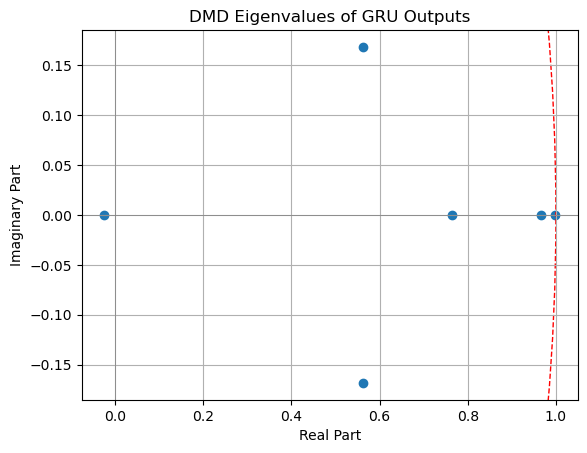

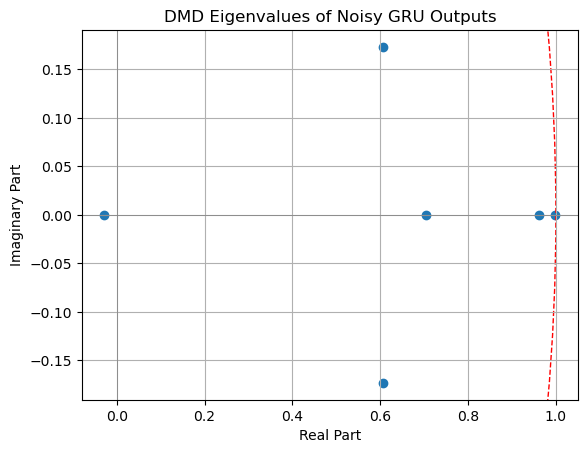

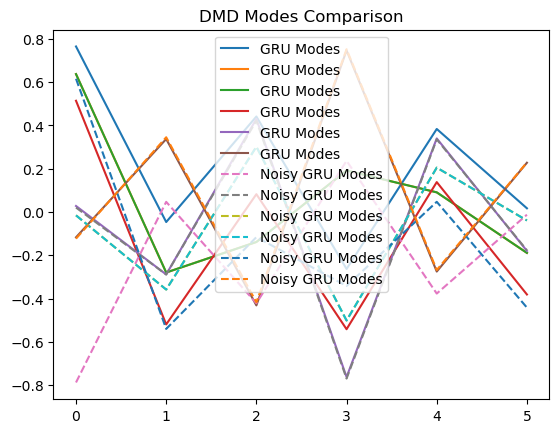

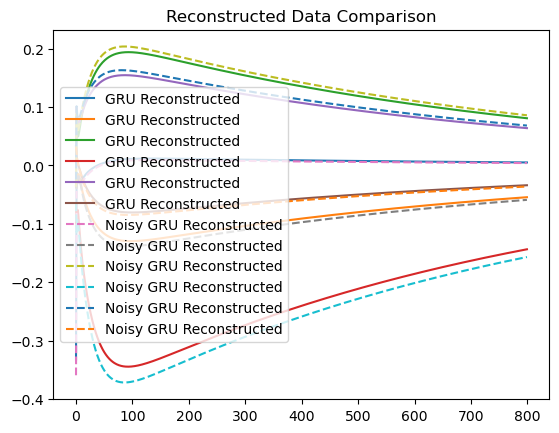

In [218]:
from pydmd import DMD  # Import the DMD class
import matplotlib.pyplot as plt

# Define function to collect model outputs
def collect_model_outputs(model, inputs_torch, device):
    model.to(device)
    model.eval()  # Ensure the model is in evaluation mode
    outputs = []
    with torch.no_grad():
        hidden = model.init_hidden(batch_size=1).to(device)  # Initialize the hidden state
        print(f"Initial hidden state shape: {hidden.shape}")
        for time_step in inputs_torch:
            time_step = time_step.to(device)
            print(f"Time step shape: {time_step.shape}")
            if time_step.shape[0] != input_size:
                raise ValueError(f"Input size mismatch: got {time_step.shape[0]}, expected {input_size}")
            if torch.isnan(time_step).any() or torch.isinf(time_step).any():
                print(f"Invalid value detected in time step: {time_step}")
                continue
            output, hidden = model(time_step.unsqueeze(0), hidden)  # Add batch dimension, pass hidden state
            print(f"Output shape: {output.shape}, Hidden state shape: {hidden.shape}")
            outputs.append(output.cpu())
    return torch.stack(outputs).numpy() if outputs else np.array([])

# Function to plot DMD eigenvalues
def plot_dmd_eigs(dmd, title):
    plt.figure()
    eigenvalues = dmd.eigs
    plt.scatter(eigenvalues.real, eigenvalues.imag)
    unit_circle = plt.Circle((0, 0), 1, color='r', fill=False, linestyle='--')
    plt.gca().add_artist(unit_circle)
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title(title)
    plt.grid()
    plt.show()

# Prepare the dataloader and collect data
task_datamodule.setup()
dataloader = task_datamodule.train_dataloader()
inputs = []

for batch in dataloader:
    print(f"Batch shape: {batch[0].shape}")  # Debugging: Print the shape of each batch
    inputs.append(batch[0])  # Assuming that the inputs are in the first element of the batch

inputs_torch = torch.cat(inputs, dim=0)  # Concatenate all batches into a single tensor
print(f"Concatenated inputs shape: {inputs_torch.shape}")  # Debugging: Print the shape of the concatenated inputs

# Ensure the input size matches the model's expected input size
# Assuming inputs_torch should be reshaped to (total_samples, input_size)
total_samples, input_dim = inputs_torch.shape
print(f"Total samples: {total_samples}, Input dimension: {input_dim}")

# Adjust input dimensions to match model's expected input size
if input_dim != input_size:
    print(f"Adjusting input dimension from {input_dim} to {input_size}")
    # Here we simply pad the inputs with zeros, but this should be adjusted based on your specific data requirements
    padding = input_size - input_dim
    inputs_torch = torch.nn.functional.pad(inputs_torch, (0, padding))
    print(f"Adjusted inputs shape: {inputs_torch.shape}")

gru_outputs = collect_model_outputs(gru_rnn_loaded, inputs_torch, device)
if gru_outputs.size == 0:
    raise ValueError("No valid GRU outputs collected due to invalid input values.")

noisy_gru_outputs = collect_model_outputs(noisy_gru_rnn_loaded, inputs_torch, device)
if noisy_gru_outputs.size == 0:
    raise ValueError("No valid Noisy GRU outputs collected due to invalid input values.")

# Perform DMD on the GRU outputs
dmd_gru = DMD(svd_rank=20)
dmd_gru.fit(gru_outputs.T)

# Perform DMD on the Noisy GRU outputs
dmd_noisy_gru = DMD(svd_rank=20)
dmd_noisy_gru.fit(noisy_gru_outputs.T)

# Plot the DMD eigenvalues comparison
plot_dmd_eigs(dmd_gru, "DMD Eigenvalues of GRU Outputs")
plot_dmd_eigs(dmd_noisy_gru, "DMD Eigenvalues of Noisy GRU Outputs")

# Compare DMD modes
plt.figure()
plt.plot(dmd_gru.modes.real, label="GRU Modes")
plt.plot(dmd_noisy_gru.modes.real, label="Noisy GRU Modes", linestyle='dashed')
plt.title("DMD Modes Comparison")
plt.legend()
plt.show()

# Compare reconstructed data
gru_reconstructed = dmd_gru.reconstructed_data.real
noisy_gru_reconstructed = dmd_noisy_gru.reconstructed_data.real

plt.figure()
plt.plot(gru_reconstructed.T, label="GRU Reconstructed")
plt.plot(noisy_gru_reconstructed.T, label="Noisy GRU Reconstructed", linestyle='dashed')
plt.title("Reconstructed Data Comparison")
plt.legend()
plt.show()


Making sure coresponding modes are of the same color

Batch shape: torch.Size([256, 4])
Batch shape: torch.Size([256, 4])
Batch shape: torch.Size([256, 4])
Batch shape: torch.Size([32, 4])
Concatenated inputs shape: torch.Size([800, 4])
Total samples: 800, Input dimension: 4
Adjusting input dimension from 4 to 17
Adjusted inputs shape: torch.Size([800, 17])
Initial hidden state shape: torch.Size([1, 128])
Time step shape: torch.Size([17])
Output shape: torch.Size([1, 6]), Hidden state shape: torch.Size([1, 128])
Time step shape: torch.Size([17])
Output shape: torch.Size([1, 6]), Hidden state shape: torch.Size([1, 128])
Time step shape: torch.Size([17])
Output shape: torch.Size([1, 6]), Hidden state shape: torch.Size([1, 128])
Time step shape: torch.Size([17])
Output shape: torch.Size([1, 6]), Hidden state shape: torch.Size([1, 128])
Time step shape: torch.Size([17])
Output shape: torch.Size([1, 6]), Hidden state shape: torch.Size([1, 128])
Time step shape: torch.Size([17])
Output shape: torch.Size([1, 6]), Hidden state shape: torch.Size([

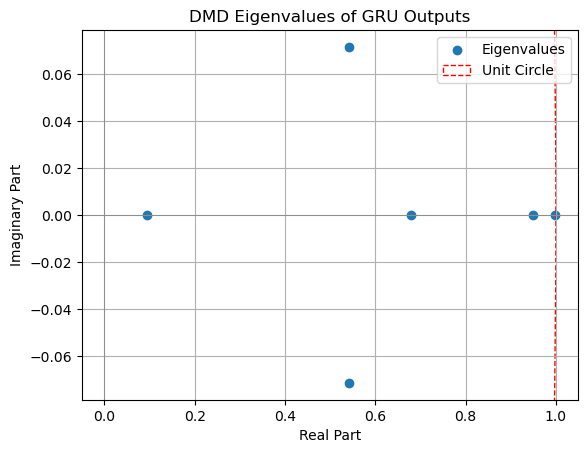

NameError: name 'plot_dmd_eigenvalues2' is not defined

In [285]:
from pydmd import DMD  # Import the DMD class
import matplotlib.pyplot as plt

# Define function to collect model outputs
def collect_model_outputs(model, inputs_torch, device):
    model.to(device)
    model.eval()  # Ensure the model is in evaluation mode
    outputs = []
    with torch.no_grad():
        hidden = model.init_hidden(batch_size=1).to(device)  # Initialize the hidden state
        print(f"Initial hidden state shape: {hidden.shape}")
        for time_step in inputs_torch:
            time_step = time_step.to(device)
            print(f"Time step shape: {time_step.shape}")
            if time_step.shape[0] != input_size:
                raise ValueError(f"Input size mismatch: got {time_step.shape[0]}, expected {input_size}")
            if torch.isnan(time_step).any() or torch.isinf(time_step).any():
                print(f"Invalid value detected in time step: {time_step}")
                continue
            output, hidden = model(time_step.unsqueeze(0), hidden)  # Add batch dimension, pass hidden state
            print(f"Output shape: {output.shape}, Hidden state shape: {hidden.shape}")
            outputs.append(output.cpu())
    return torch.stack(outputs).numpy() if outputs else np.array([])

# Custom function to plot DMD eigenvalues
def plot_dmd_eigenvalues1(dmd, title):
    plt.figure()
    eigenvalues = dmd.eigs
    plt.scatter(eigenvalues.real, eigenvalues.imag, label='Eigenvalues')
    unit_circle = plt.Circle((0, 0), 1, color='r', fill=False, linestyle='--', label='Unit Circle')
    plt.gca().add_artist(unit_circle)
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

def plot_dmd_eigenvalues1(dmd, title):
    plt.figure()
    eigenvalues = dmd.eigs
    plt.scatter(eigenvalues.real, eigenvalues.imag, label='Eigenvalues')
    unit_circle = plt.Circle((0, 0), 1, color='r', fill=False, linestyle='--', label='Unit Circle')
    plt.gca().add_artist(unit_circle)
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Prepare the dataloader and collect data
task_datamodule.setup()
dataloader = task_datamodule.train_dataloader()
inputs = []

for batch in dataloader:
    print(f"Batch shape: {batch[0].shape}")  # Debugging: Print the shape of each batch
    inputs.append(batch[0])  # Assuming that the inputs are in the first element of the batch

inputs_torch = torch.cat(inputs, dim=0)  # Concatenate all batches into a single tensor
print(f"Concatenated inputs shape: {inputs_torch.shape}")  # Debugging: Print the shape of the concatenated inputs

# Ensure the input size matches the model's expected input size
# Assuming inputs_torch should be reshaped to (total_samples, input_size)
total_samples, input_dim = inputs_torch.shape
print(f"Total samples: {total_samples}, Input dimension: {input_dim}")

# Adjust input dimensions to match model's expected input size
if input_dim != input_size:
    print(f"Adjusting input dimension from {input_dim} to {input_size}")
    # Here we simply pad the inputs with zeros, but this should be adjusted based on your specific data requirements
    padding = input_size - input_dim
    inputs_torch = torch.nn.functional.pad(inputs_torch, (0, padding))
    print(f"Adjusted inputs shape: {inputs_torch.shape}")

gru_outputs = collect_model_outputs(gru_rnn_loaded, inputs_torch, device)
if gru_outputs.size == 0:
    raise ValueError("No valid GRU outputs collected due to invalid input values.")

noisy_gru_outputs = collect_model_outputs(noisy_gru_rnn_loaded, inputs_torch, device)
if noisy_gru_outputs.size == 0:
    raise ValueError("No valid Noisy GRU outputs collected due to invalid input values.")

# Perform DMD on the GRU outputs
dmd_gru = DMD(svd_rank=20)
dmd_gru.fit(gru_outputs.T)

# Perform DMD on the Noisy GRU outputs
dmd_noisy_gru = DMD(svd_rank=20)
dmd_noisy_gru.fit(noisy_gru_outputs.T)

# Plot the DMD eigenvalues comparison
plot_dmd_eigenvalues1(dmd_gru, "DMD Eigenvalues of GRU Outputs")
plot_dmd_eigenvalues2(dmd_noisy_gru, "DMD Eigenvalues of Noisy GRU Outputs")

# Compare DMD modes
plt.figure()
for i, (gru_mode, noisy_gru_mode) in enumerate(zip(dmd_gru.modes.T, dmd_noisy_gru.modes.T)):
    plt.plot(gru_mode.real, label=f"GRU Mode {i+1}")
    plt.plot(noisy_gru_mode.real, linestyle='dashed', label=f"Noisy GRU Mode {i+1}")

plt.title("DMD Modes Comparison")
plt.legend()
plt.show()

# Compare reconstructed data
gru_reconstructed = dmd_gru.reconstructed_data.real
noisy_gru_reconstructed = dmd_noisy_gru.reconstructed_data.real

plt.figure()
for i in range(gru_reconstructed.shape[0]):
    plt.plot(gru_reconstructed[i, :], label=f"GRU Reconstructed {i+1}")
    plt.plot(noisy_gru_reconstructed[i, :], linestyle='dashed', label=f"Noisy GRU Reconstructed {i+1}")

plt.title("Reconstructed Data Comparison")
plt.legend()
plt.show()


Batch shape: torch.Size([256, 4])
Batch shape: torch.Size([256, 4])
Batch shape: torch.Size([256, 4])
Batch shape: torch.Size([32, 4])
Concatenated inputs shape: torch.Size([800, 4])
Total samples: 800, Input dimension: 4
Adjusting input dimension from 4 to 17
Adjusted inputs shape: torch.Size([800, 17])
Initial hidden state shape: torch.Size([1, 128])
Time step shape: torch.Size([17])
Output shape: torch.Size([1, 6]), Hidden state shape: torch.Size([1, 128])
Time step shape: torch.Size([17])
Output shape: torch.Size([1, 6]), Hidden state shape: torch.Size([1, 128])
Time step shape: torch.Size([17])
Output shape: torch.Size([1, 6]), Hidden state shape: torch.Size([1, 128])
Time step shape: torch.Size([17])
Output shape: torch.Size([1, 6]), Hidden state shape: torch.Size([1, 128])
Time step shape: torch.Size([17])
Output shape: torch.Size([1, 6]), Hidden state shape: torch.Size([1, 128])
Time step shape: torch.Size([17])
Output shape: torch.Size([1, 6]), Hidden state shape: torch.Size([

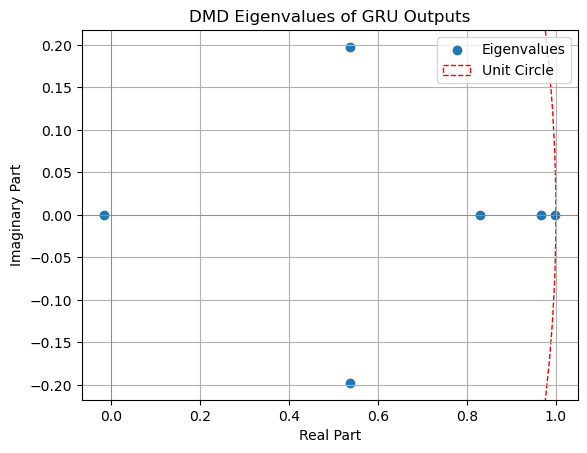

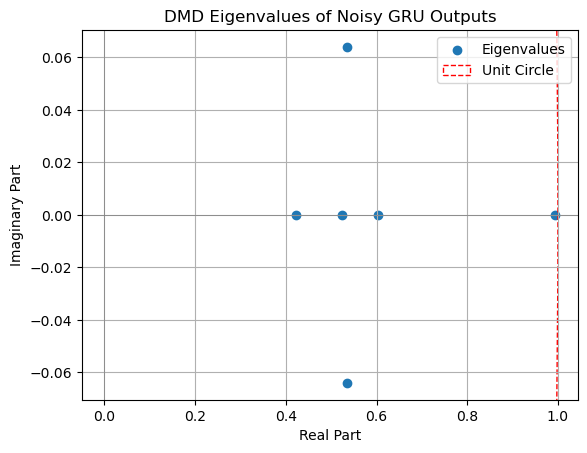

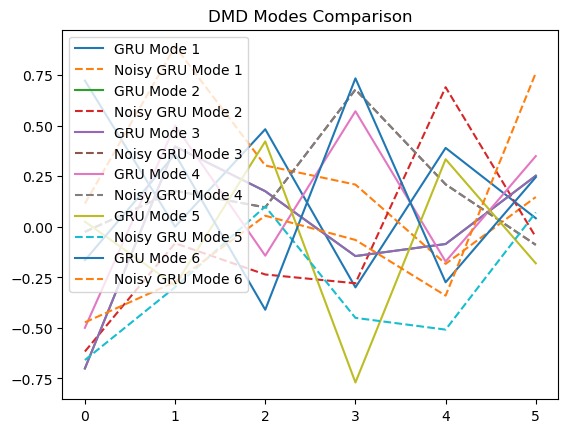

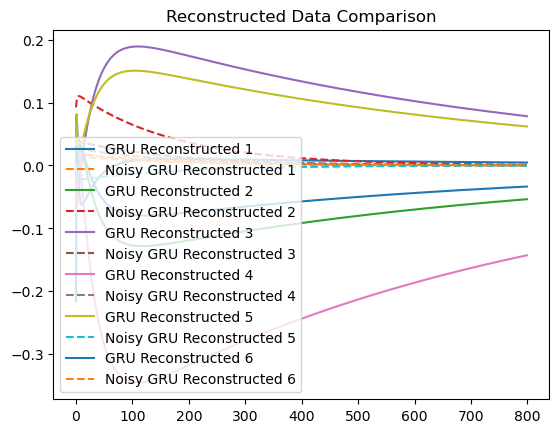

Computing Hankel matrix ...
Hankel matrix computed!
Computing SVD on Hankel matrix ...
SVD complete!
Computing least squares fits to HAVOK DMD ...


_LinAlgError: linalg.inv: The diagonal element 1 is zero, the inversion could not be completed because the input matrix is singular.

In [239]:
from pydmd import DMD  # Import the DMD class
import matplotlib.pyplot as plt

# Define function to collect model outputs
def collect_model_outputs(model, inputs_torch, device):
    model.to(device)
    model.eval()  # Ensure the model is in evaluation mode
    outputs = []
    with torch.no_grad():
        hidden = model.init_hidden(batch_size=1).to(device)  # Initialize the hidden state
        print(f"Initial hidden state shape: {hidden.shape}")
        for time_step in inputs_torch:
            time_step = time_step.to(device)
            print(f"Time step shape: {time_step.shape}")
            if time_step.shape[0] != input_size:
                raise ValueError(f"Input size mismatch: got {time_step.shape[0]}, expected {input_size}")
            if torch.isnan(time_step).any() or torch.isinf(time_step).any():
                print(f"Invalid value detected in time step: {time_step}")
                continue
            output, hidden = model(time_step.unsqueeze(0), hidden)  # Add batch dimension, pass hidden state
            print(f"Output shape: {output.shape}, Hidden state shape: {hidden.shape}")
            outputs.append(output.cpu())
    return torch.stack(outputs).numpy() if outputs else np.array([])

# Custom function to plot DMD eigenvalues
def plot_dmd_eigenvalues(dmd, title):
    plt.figure()
    eigenvalues = dmd.eigs
    plt.scatter(eigenvalues.real, eigenvalues.imag, label='Eigenvalues')
    unit_circle = plt.Circle((0, 0), 1, color='r', fill=False, linestyle='--', label='Unit Circle')
    plt.gca().add_artist(unit_circle)
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Prepare the dataloader and collect data
task_datamodule.setup()
dataloader = task_datamodule.train_dataloader()
inputs = []

for batch in dataloader:
    print(f"Batch shape: {batch[0].shape}")  # Debugging: Print the shape of each batch
    inputs.append(batch[0])  # Assuming that the inputs are in the first element of the batch

inputs_torch = torch.cat(inputs, dim=0)  # Concatenate all batches into a single tensor
print(f"Concatenated inputs shape: {inputs_torch.shape}")  # Debugging: Print the shape of the concatenated inputs

# Ensure the input size matches the model's expected input size
# Assuming inputs_torch should be reshaped to (total_samples, input_size)
total_samples, input_dim = inputs_torch.shape
print(f"Total samples: {total_samples}, Input dimension: {input_dim}")

# Adjust input dimensions to match model's expected input size
if input_dim != input_size:
    print(f"Adjusting input dimension from {input_dim} to {input_size}")
    # Here we simply pad the inputs with zeros, but this should be adjusted based on your specific data requirements
    padding = input_size - input_dim
    inputs_torch = torch.nn.functional.pad(inputs_torch, (0, padding))
    print(f"Adjusted inputs shape: {inputs_torch.shape}")

gru_outputs = collect_model_outputs(gru_rnn_loaded, inputs_torch, device)
if gru_outputs.size == 0:
    raise ValueError("No valid GRU outputs collected due to invalid input values.")

noisy_gru_outputs = collect_model_outputs(noisy_gru_rnn_loaded, inputs_torch, device)
if noisy_gru_outputs.size == 0:
    raise ValueError("No valid Noisy GRU outputs collected due to invalid input values.")

# Perform DMD on the GRU outputs
dmd_gru = DMD(svd_rank=20)
dmd_gru.fit(gru_outputs.T)

# Perform DMD on the Noisy GRU outputs
dmd_noisy_gru = DMD(svd_rank=20)
dmd_noisy_gru.fit(noisy_gru_outputs.T)

# Plot the DMD eigenvalues comparison
plot_dmd_eigenvalues(dmd_gru, "DMD Eigenvalues of GRU Outputs")
plot_dmd_eigenvalues(dmd_noisy_gru, "DMD Eigenvalues of Noisy GRU Outputs")

# Compare DMD modes
plt.figure()
for i, (gru_mode, noisy_gru_mode) in enumerate(zip(dmd_gru.modes.T, dmd_noisy_gru.modes.T)):
    plt.plot(gru_mode.real, label=f"GRU Mode {i+1}")
    plt.plot(noisy_gru_mode.real, linestyle='dashed', label=f"Noisy GRU Mode {i+1}")

plt.title("DMD Modes Comparison")
plt.legend()
plt.show()

# Compare reconstructed data
gru_reconstructed = dmd_gru.reconstructed_data.real
noisy_gru_reconstructed = dmd_noisy_gru.reconstructed_data.real

plt.figure()
for i in range(gru_reconstructed.shape[0]):
    plt.plot(gru_reconstructed[i, :], label=f"GRU Reconstructed {i+1}")
    plt.plot(noisy_gru_reconstructed[i, :], linestyle='dashed', label=f"Noisy GRU Reconstructed {i+1}")

plt.title("Reconstructed Data Comparison")
plt.legend()
plt.show()



# Perform DSA
dsa = DSA([gru_outputs, noisy_gru_outputs], n_delays=1, rank=1, delay_interval=1, verbose=True, device='cpu')
similarities = dsa.fit_score()
print(f"DSA Similarities between GRU_RNN and NoisyGRU_RNN: {similarities}")


Batch shape: torch.Size([256, 4])
Batch shape: torch.Size([256, 4])
Batch shape: torch.Size([256, 4])
Batch shape: torch.Size([32, 4])
Concatenated inputs shape: torch.Size([800, 4])
Total samples: 800, Input dimension: 4
Adjusting input dimension from 4 to 17
Adjusted inputs shape: torch.Size([800, 17])
Initial hidden state shape: torch.Size([1, 128])
Time step shape: torch.Size([17])
Output shape: torch.Size([1, 6]), Hidden state shape: torch.Size([1, 128])
Time step shape: torch.Size([17])
Output shape: torch.Size([1, 6]), Hidden state shape: torch.Size([1, 128])
Time step shape: torch.Size([17])
Output shape: torch.Size([1, 6]), Hidden state shape: torch.Size([1, 128])
Time step shape: torch.Size([17])
Output shape: torch.Size([1, 6]), Hidden state shape: torch.Size([1, 128])
Time step shape: torch.Size([17])
Output shape: torch.Size([1, 6]), Hidden state shape: torch.Size([1, 128])
Time step shape: torch.Size([17])
Output shape: torch.Size([1, 6]), Hidden state shape: torch.Size([

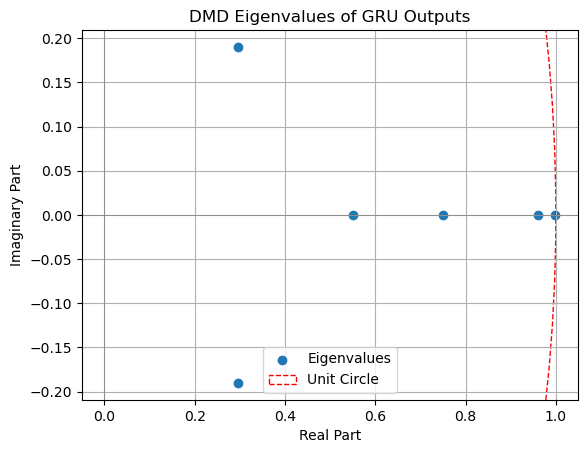

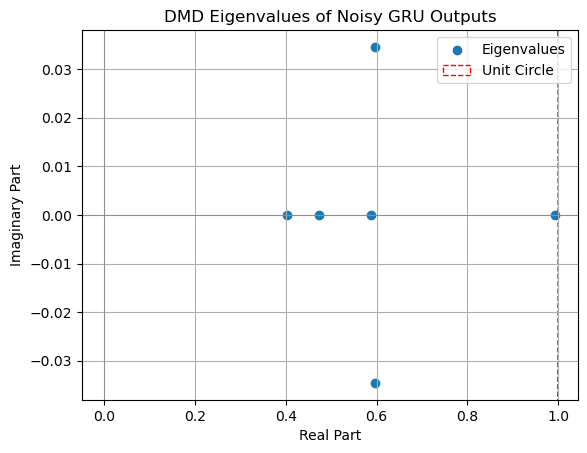

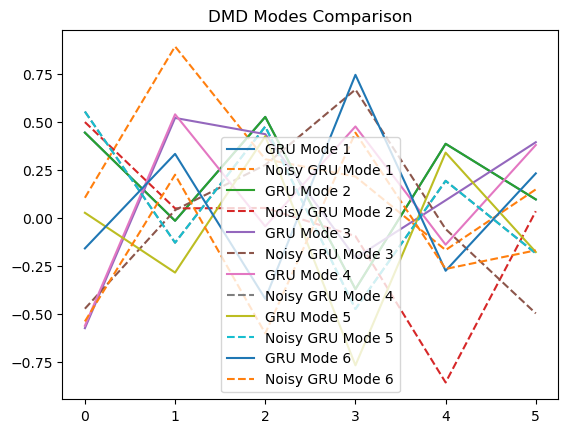

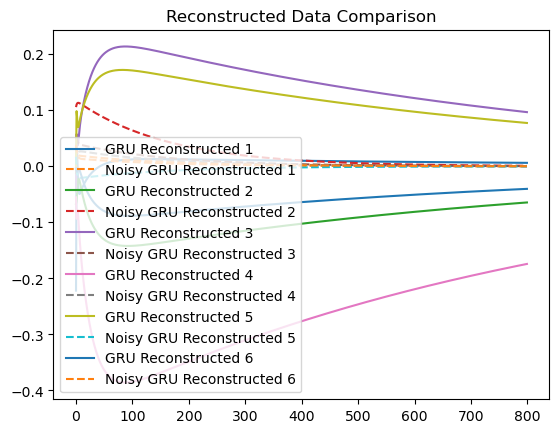

Computing Hankel matrix ...
Hankel matrix computed!
Computing SVD on Hankel matrix ...
SVD complete!
Computing least squares fits to HAVOK DMD ...
Least squares complete! 

Computing Hankel matrix ...
Hankel matrix computed!
Computing SVD on Hankel matrix ...
SVD complete!
Computing least squares fits to HAVOK DMD ...
Least squares complete! 

computing similarity between DMDs 1 and 0
Finished optimizing C
Finished optimizing C
DSA Similarities between GRU_RNN and NoisyGRU_RNN: [[0. 0.]
 [0. 0.]]


In [385]:
from pydmd import DMD  # Import the DMD class
import matplotlib.pyplot as plt


# Define function to collect model outputs
def collect_model_outputs(model, inputs_torch, device):
    model.to(device)
    model.eval()  # Ensure the model is in evaluation mode
    outputs = []
    with torch.no_grad():
        hidden = model.init_hidden(batch_size=1).to(device)  # Initialize the hidden state
        print(f"Initial hidden state shape: {hidden.shape}")
        for time_step in inputs_torch:
            time_step = time_step.to(device)
            print(f"Time step shape: {time_step.shape}")
            if time_step.shape[0] != input_size:
                raise ValueError(f"Input size mismatch: got {time_step.shape[0]}, expected {input_size}")
            if torch.isnan(time_step).any() or torch.isinf(time_step).any():
                print(f"Invalid value detected in time step: {time_step}")
                continue
            output, hidden = model(time_step.unsqueeze(0), hidden)  # Add batch dimension, pass hidden state
            print(f"Output shape: {output.shape}, Hidden state shape: {hidden.shape}")
            outputs.append(output.cpu())
    return torch.stack(outputs).numpy() if outputs else np.array([])

# Custom function to plot DMD eigenvalues
def plot_dmd_eigenvalues(dmd, title):
    plt.figure()
    eigenvalues = dmd.eigs
    plt.scatter(eigenvalues.real, eigenvalues.imag, label='Eigenvalues')
    unit_circle = plt.Circle((0, 0), 1, color='r', fill=False, linestyle='--', label='Unit Circle')
    plt.gca().add_artist(unit_circle)
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Prepare the dataloader and collect data
task_datamodule.setup()
dataloader = task_datamodule.train_dataloader()
inputs = []

for batch in dataloader:
    print(f"Batch shape: {batch[0].shape}")  # Debugging: Print the shape of each batch
    inputs.append(batch[0])  # Assuming that the inputs are in the first element of the batch

inputs_torch = torch.cat(inputs, dim=0)  # Concatenate all batches into a single tensor
print(f"Concatenated inputs shape: {inputs_torch.shape}")  # Debugging: Print the shape of the concatenated inputs

# Ensure the input size matches the model's expected input size
# Assuming inputs_torch should be reshaped to (total_samples, input_size)
total_samples, input_dim = inputs_torch.shape
print(f"Total samples: {total_samples}, Input dimension: {input_dim}")

# Adjust input dimensions to match model's expected input size
if input_dim != input_size:
    print(f"Adjusting input dimension from {input_dim} to {input_size}")
    # Here we simply pad the inputs with zeros, but this should be adjusted based on your specific data requirements
    padding = input_size - input_dim
    inputs_torch = torch.nn.functional.pad(inputs_torch, (0, padding))
    print(f"Adjusted inputs shape: {inputs_torch.shape}")

gru_outputs = collect_model_outputs(gru_rnn_loaded, inputs_torch, device)
if gru_outputs.size == 0:
    raise ValueError("No valid GRU outputs collected due to invalid input values.")

noisy_gru_outputs = collect_model_outputs(noisy_gru_rnn_loaded, inputs_torch, device)
if noisy_gru_outputs.size == 0:
    raise ValueError("No valid Noisy GRU outputs collected due to invalid input values.")

# Perform DMD on the GRU outputs
dmd_gru = DMD(svd_rank=20)
dmd_gru.fit(gru_outputs.T)

# Perform DMD on the Noisy GRU outputs
dmd_noisy_gru = DMD(svd_rank=20)
dmd_noisy_gru.fit(noisy_gru_outputs.T)

# Plot the DMD eigenvalues comparison
plot_dmd_eigenvalues(dmd_gru, "DMD Eigenvalues of GRU Outputs")
plot_dmd_eigenvalues(dmd_noisy_gru, "DMD Eigenvalues of Noisy GRU Outputs")

# Compare DMD modes
plt.figure()
for i, (gru_mode, noisy_gru_mode) in enumerate(zip(dmd_gru.modes.T, dmd_noisy_gru.modes.T)):
    plt.plot(gru_mode.real, label=f"GRU Mode {i+1}")
    plt.plot(noisy_gru_mode.real, linestyle='dashed', label=f"Noisy GRU Mode {i+1}")

plt.title("DMD Modes Comparison")
plt.legend()
plt.show()

# Compare reconstructed data
gru_reconstructed = dmd_gru.reconstructed_data.real
noisy_gru_reconstructed = dmd_noisy_gru.reconstructed_data.real

plt.figure()
for i in range(gru_reconstructed.shape[0]):
    plt.plot(gru_reconstructed[i, :], label=f"GRU Reconstructed {i+1}")
    plt.plot(noisy_gru_reconstructed[i, :], linestyle='dashed', label=f"Noisy GRU Reconstructed {i+1}")

plt.title("Reconstructed Data Comparison")
plt.legend()
plt.show()

# Perform DSA with reduced number of delays
dsa = DSA([gru_outputs, noisy_gru_outputs], n_delays=1, rank=5, delay_interval=1, lamb=1e-3, verbose=True, device='cpu')
similarities = dsa.fit_score()
print(f"DSA Similarities between GRU_RNN and NoisyGRU_RNN: {similarities}")


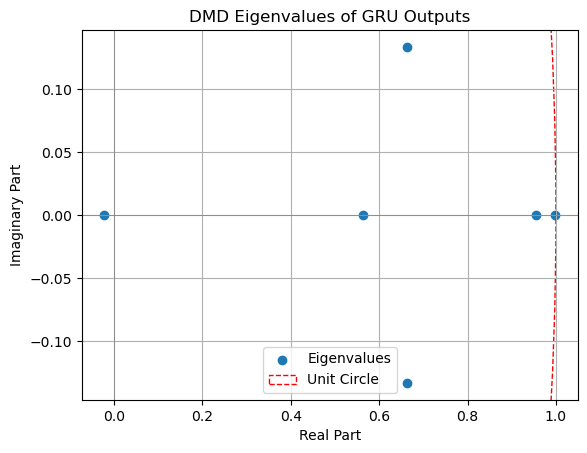

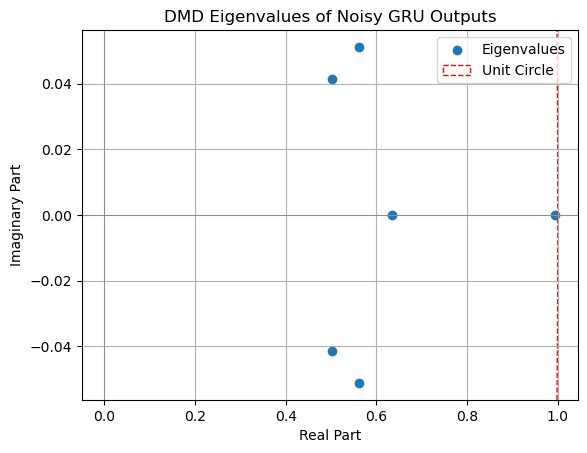

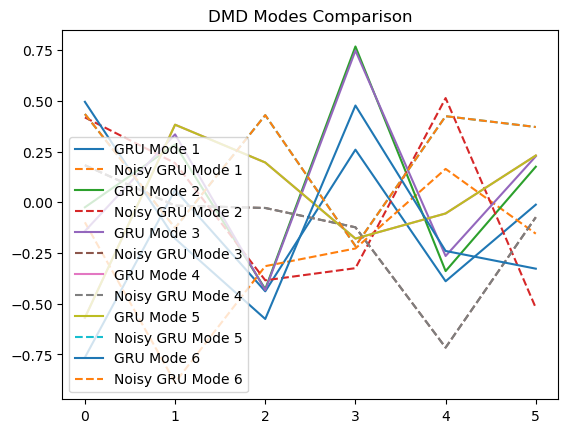

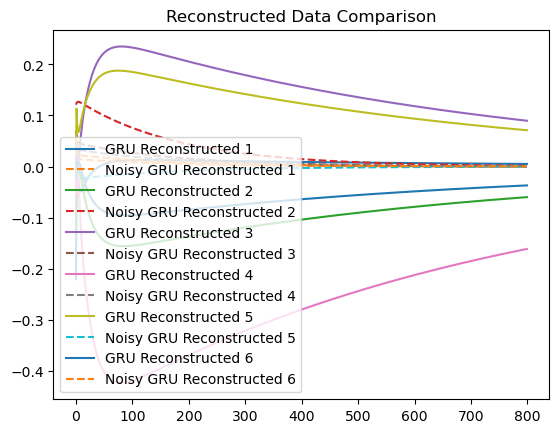

Computing Hankel matrix ...
Hankel matrix computed!
Computing SVD on Hankel matrix ...
SVD complete!
Computing least squares fits to HAVOK DMD ...
Least squares complete! 

Computing Hankel matrix ...
Hankel matrix computed!
Computing SVD on Hankel matrix ...
SVD complete!
Computing least squares fits to HAVOK DMD ...
Least squares complete! 

computing similarity between DMDs 1 and 0
Finished optimizing C
Finished optimizing C
DSA Similarities between GRU_RNN and NoisyGRU_RNN: [[0. 0.]
 [0. 0.]]


In [409]:
from pydmd import DMD  # Import the DMD class
import matplotlib.pyplot as plt


# Define function to collect model outputs
def collect_model_outputs(model, inputs_torch, device):
    model.to(device)
    model.eval()  # Ensure the model is in evaluation mode
    outputs = []
    with torch.no_grad():
        hidden = model.init_hidden(batch_size=1).to(device)  # Initialize the hidden state
        for time_step in inputs_torch:
            time_step = time_step.to(device)
            if time_step.shape[0] != input_size:
                raise ValueError(f"Input size mismatch: got {time_step.shape[0]}, expected {input_size}")
            if torch.isnan(time_step).any() or torch.isinf(time_step).any():
                continue
            output, hidden = model(time_step.unsqueeze(0), hidden)  # Add batch dimension, pass hidden state
            outputs.append(output.cpu())
    return torch.stack(outputs).numpy() if outputs else np.array([])

# Custom function to plot DMD eigenvalues
def plot_dmd_eigenvalues(dmd, title):
    plt.figure()
    eigenvalues = dmd.eigs
    plt.scatter(eigenvalues.real, eigenvalues.imag, label='Eigenvalues')
    unit_circle = plt.Circle((0, 0), 1, color='r', fill=False, linestyle='--', label='Unit Circle')
    plt.gca().add_artist(unit_circle)
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Prepare the dataloader and collect data
task_datamodule.setup()
dataloader = task_datamodule.train_dataloader()
inputs = []

for batch in dataloader:
    inputs.append(batch[0])  # Assuming that the inputs are in the first element of the batch

inputs_torch = torch.cat(inputs, dim=0)  # Concatenate all batches into a single tensor

# Ensure the input size matches the model's expected input size
total_samples, input_dim = inputs_torch.shape

# Adjust input dimensions to match model's expected input size
if input_dim != input_size:
    padding = input_size - input_dim
    inputs_torch = torch.nn.functional.pad(inputs_torch, (0, padding))

gru_outputs = collect_model_outputs(gru_rnn_loaded, inputs_torch, device)
noisy_gru_outputs = collect_model_outputs(noisy_gru_rnn_loaded, inputs_torch, device)

# Perform DMD on the GRU outputs
dmd_gru = DMD(svd_rank=10)  # Adjust svd_rank
dmd_gru.fit(gru_outputs.T)

# Perform DMD on the Noisy GRU outputs
dmd_noisy_gru = DMD(svd_rank=10)  # Adjust svd_rank
dmd_noisy_gru.fit(noisy_gru_outputs.T)

# Plot the DMD eigenvalues comparison
plot_dmd_eigenvalues(dmd_gru, "DMD Eigenvalues of GRU Outputs")
plot_dmd_eigenvalues(dmd_noisy_gru, "DMD Eigenvalues of Noisy GRU Outputs")

# Compare DMD modes
plt.figure()
for i, (gru_mode, noisy_gru_mode) in enumerate(zip(dmd_gru.modes.T, dmd_noisy_gru.modes.T)):
    plt.plot(gru_mode.real, label=f"GRU Mode {i+1}")
    plt.plot(noisy_gru_mode.real, linestyle='dashed', label=f"Noisy GRU Mode {i+1}")

plt.title("DMD Modes Comparison")
plt.legend()
plt.show()

# Compare reconstructed data
gru_reconstructed = dmd_gru.reconstructed_data.real
noisy_gru_reconstructed = dmd_noisy_gru.reconstructed_data.real

plt.figure()
for i in range(gru_reconstructed.shape[0]):
    plt.plot(gru_reconstructed[i, :], label=f"GRU Reconstructed {i+1}")
    plt.plot(noisy_gru_reconstructed[i, :], linestyle='dashed', label=f"Noisy GRU Reconstructed {i+1}")

plt.title("Reconstructed Data Comparison")
plt.legend()
plt.show()

# Perform DSA with adjusted parameters
dsa = DSA([gru_outputs, noisy_gru_outputs], n_delays=1, rank=20, delay_interval=1, lamb=1e-3, verbose=True, device='cpu')
similarities = dsa.fit_score()
print(f"DSA Similarities between GRU_RNN and NoisyGRU_RNN: {similarities}")


GRU Outputs 1 Shape: (800, 1, 6), First few values: [[[-3.2326093  3.6295316 -7.440761   7.7258615 -6.778518   5.012567 ]]

 [[-3.4016786  3.0360463 -8.225685   7.9525957 -7.2655816  5.28245  ]]

 [[-2.8236578  4.4825726 -7.061362   7.9781184 -6.365208   6.6889887]]

 [[-2.4601884  4.1961484 -5.483899   6.9565897 -4.756967   5.9066725]]

 [[-2.1492858  3.7686496 -4.695101   6.37677   -3.9870117  5.2889867]]]
GRU Outputs 2 Shape: (800, 1, 6), First few values: [[[-3.469629   3.6221602 -7.9359627  8.015535  -7.5087934  5.145291 ]]

 [[-3.6807055  2.9772592 -8.296721   7.9018884 -7.4179077  5.2375073]]

 [[-2.8812451  4.4023495 -7.165787   7.865886  -6.3907785  6.613869 ]]

 [[-2.4313304  4.2034674 -5.6967597  6.9442544 -4.8264813  5.9131527]]

 [[-2.1284099  3.8433962 -4.942841   6.4032664 -4.0718327  5.3321905]]]


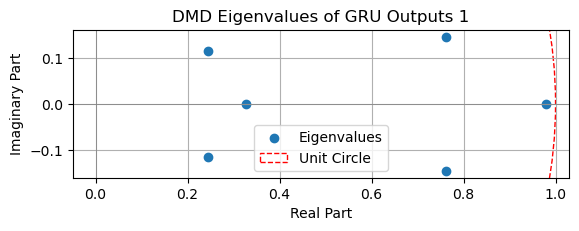

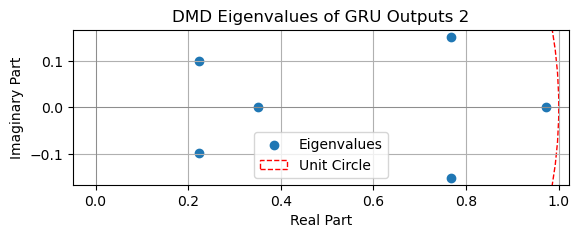

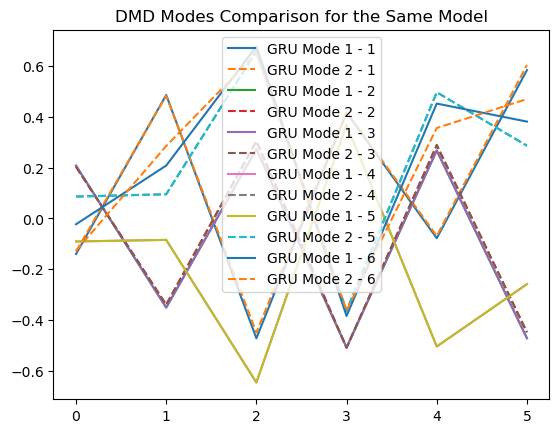

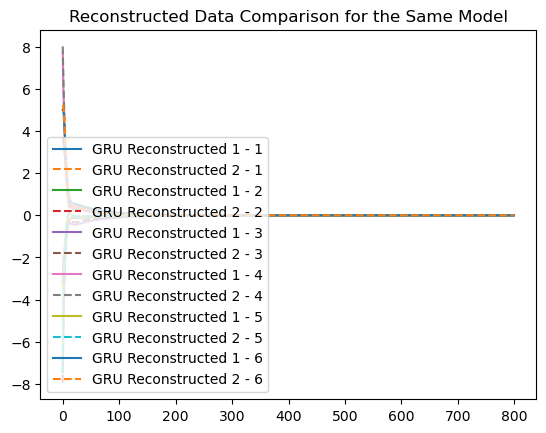

DSA Similarity between GRU and Noisy GRU: 0.23382499814033508


In [519]:
from pydmd import DMD  # Import the DMD class
import matplotlib.pyplot as plt
import numpy as np

# Define function to collect model outputs
def collect_model_outputs(model, inputs_torch, device):
    model.to(device)
    model.eval()  # Ensure the model is in evaluation mode
    outputs = []
    with torch.no_grad():
        hidden = model.init_hidden(batch_size=1).to(device)  # Initialize the hidden state
        for time_step in inputs_torch:
            time_step = time_step.to(device)
            if time_step.shape[0] != input_size:
                raise ValueError(f"Input size mismatch: got {time_step.shape[0]}, expected {input_size}")
            if torch.isnan(time_step).any() or torch.isinf(time_step).any():
                continue
            output, hidden = model(time_step.unsqueeze(0), hidden)  # Add batch dimension, pass hidden state
            outputs.append(output.cpu())
    return torch.stack(outputs).numpy() if outputs else np.array([])

# Custom function to plot DMD eigenvalues
def plot_dmd_eigenvalues(dmd, title):
    plt.figure()
    eigenvalues = dmd.eigs
    plt.scatter(eigenvalues.real, eigenvalues.imag, label='Eigenvalues')
    unit_circle = plt.Circle((0, 0), 1, color='r', fill=False, linestyle='--', label='Unit Circle')
    ax = plt.gca()
    ax.add_artist(unit_circle)
    ax.set_aspect('equal', 'box')  # Ensure the aspect ratio is equal
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Normalize the collected outputs
def normalize_outputs(outputs):
    mean = np.mean(outputs, axis=0)
    std = np.std(outputs, axis=0)
    return (outputs - mean) / std

# Prepare the dataloader and collect data
task_datamodule.setup()
dataloader = task_datamodule.train_dataloader()
inputs = []

for batch in dataloader:
    inputs.append(batch[0])  # Assuming that the inputs are in the first element of the batch

inputs_torch = torch.cat(inputs, dim=0)  # Concatenate all batches into a single tensor

# Ensure the input size matches the model's expected input size
total_samples, input_dim = inputs_torch.shape

# Adjust input dimensions to match model's expected input size
if input_dim != input_size:
    padding = input_size - input_dim
    inputs_torch = torch.nn.functional.pad(inputs_torch, (0, padding))

# Collect outputs from the same model twice for testing
gru_outputs1 = collect_model_outputs(gru_rnn_loaded, inputs_torch, device)
gru_outputs2 = collect_model_outputs(gru_rnn_loaded, inputs_torch, device)

# Normalize the outputs
gru_outputs1 = normalize_outputs(gru_outputs1)
gru_outputs2 = normalize_outputs(gru_outputs2)

# Print the shapes and first few values for debugging
print(f"GRU Outputs 1 Shape: {gru_outputs1.shape}, First few values: {gru_outputs1[:5]}")
print(f"GRU Outputs 2 Shape: {gru_outputs2.shape}, First few values: {gru_outputs2[:5]}")

# Perform DMD on the GRU outputs
dmd_gru1 = DMD(svd_rank=40)  # Adjust svd_rank
dmd_gru1.fit(gru_outputs1.T)

dmd_gru2 = DMD(svd_rank=40)  # Adjust svd_rank
dmd_gru2.fit(gru_outputs2.T)

# Plot the DMD eigenvalues comparison
plot_dmd_eigenvalues(dmd_gru1, "DMD Eigenvalues of GRU Outputs 1")
plot_dmd_eigenvalues(dmd_gru2, "DMD Eigenvalues of GRU Outputs 2")

# Compare DMD modes
plt.figure()
for i, (gru_mode1, gru_mode2) in enumerate(zip(dmd_gru1.modes.T, dmd_gru2.modes.T)):
    plt.plot(gru_mode1.real, label=f"GRU Mode 1 - {i+1}")
    plt.plot(gru_mode2.real, linestyle='dashed', label=f"GRU Mode 2 - {i+1}")

plt.title("DMD Modes Comparison for the Same Model")
plt.legend()
plt.show()

# Compare reconstructed data
gru_reconstructed1 = dmd_gru1.reconstructed_data.real
gru_reconstructed2 = dmd_gru2.reconstructed_data.real

plt.figure()
for i in range(gru_reconstructed1.shape[0]):
    plt.plot(gru_reconstructed1[i, :], label=f"GRU Reconstructed 1 - {i+1}")
    plt.plot(gru_reconstructed2[i, :], linestyle='dashed', label=f"GRU Reconstructed 2 - {i+1}")

plt.title("Reconstructed Data Comparison for the Same Model")
plt.legend()
plt.show()


# Perform DSA similarity comparison using the modes matrices from DMD
modes_gru1 = dmd_gru1.modes
modes_gru2 = dmd_gru2.modes

# Convert to numpy arrays if necessary
modes_gru1 = modes_gru1.real if isinstance(modes_gru1, torch.Tensor) else modes_gru1
modes_gru2 = modes_gru2.real if isinstance(modes_gru2, torch.Tensor) else modes_gru2


# Perform DSA similarity comparison
similarity_gru_noisy_gru = SimilarityTransformDist(device='cpu', iters=2000, lr=1e-3)
score_gru_noisy_gru = similarity_gru_noisy_gru.fit_score(modes_gru1, modes_gru2)
print(f"DSA Similarity between GRU and Noisy GRU: {score_gru_noisy_gru}")

#similarity_gru_node = SimilarityTransformDist(device='cpu', iters=2000, lr=1e-3)
#score_gru_node = similarity_gru_node.fit_score(modes_gru1, modes_node)
#print(f"DSA Similarity between GRU and Node: {score_gru_node}")

GRU Outputs 1 Shape: (800, 1, 6), First few values: [[[-3.774678   3.8571744 -7.8922677  7.8945994 -7.5823765  5.5955153]]

 [[-2.7750742  3.884352  -7.810037   7.8370557 -6.9367023  6.110761 ]]

 [[-3.3386767  4.860774  -7.2863765  7.5854235 -6.734719   6.741588 ]]

 [[-3.7898996  4.921697  -6.301542   6.869916  -5.942173   6.696637 ]]

 [[-1.8062806  3.3110602 -4.393515   5.9941063 -3.2515206  5.1140914]]]
GRU Outputs 2 Shape: (800, 1, 6), First few values: [[[-3.7021015  3.3333063 -8.072724   7.8418336 -7.3163605  4.269075 ]]

 [[-2.4462984  3.470887  -7.6651826  7.941763  -6.489104   5.388533 ]]

 [[-3.089476   4.8266573 -7.2016478  7.744766  -6.4908476  6.4722953]]

 [[-3.649475   5.062097  -6.2069573  6.9657664 -5.810325   6.639747 ]]

 [[-1.6485716  3.4312859 -4.2011685  5.991264  -3.0658138  5.0380044]]]


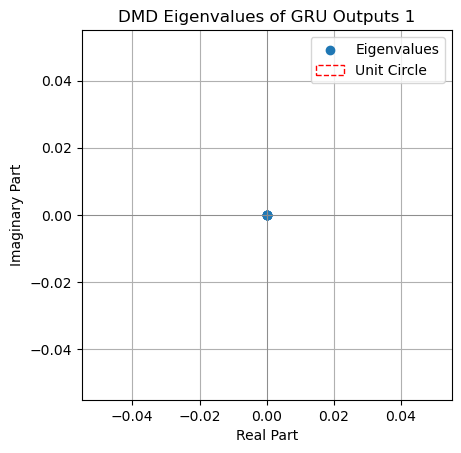

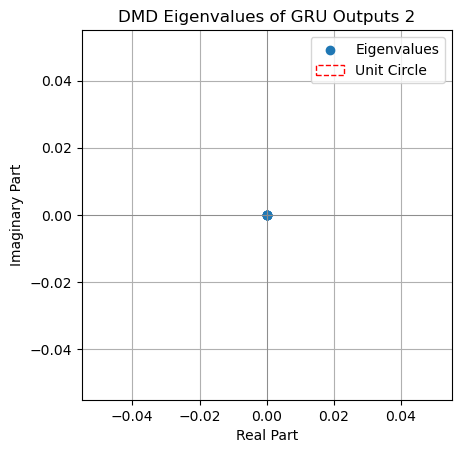

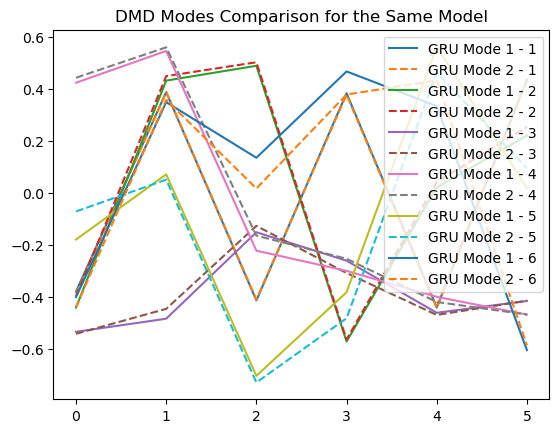

Reconstructed GRU 1 Shape: torch.Size([6, 800])
Reconstructed GRU 2 Shape: torch.Size([6, 800])


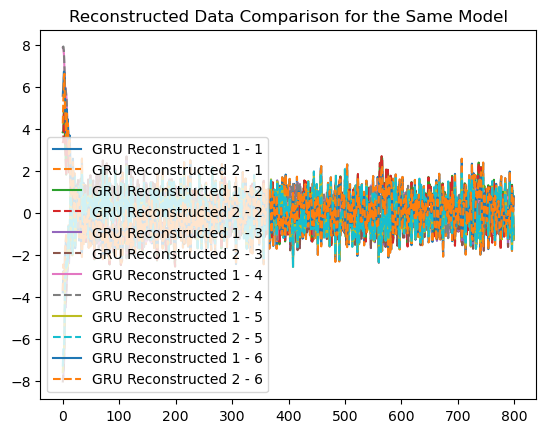

DSA Similarities between GRU Outputs 1 and GRU Outputs 2: 0


In [485]:
from pydmd import DMD as PyDMD  # Import the DMD class from pydmd
import matplotlib.pyplot as plt
from DSA.dmd import DMD as DSADMD  # Import the DMD class from DSA
from DSA.simdist import SimilarityTransformDist  # Import the SimilarityTransformDist class
import numpy as np
import torch

# Define function to collect model outputs
def collect_model_outputs(model, inputs_torch, device):
    model.to(device)
    model.eval()  # Ensure the model is in evaluation mode
    outputs = []
    with torch.no_grad():
        hidden = model.init_hidden(batch_size=1).to(device)  # Initialize the hidden state
        for time_step in inputs_torch:
            time_step = time_step.to(device)
            if time_step.shape[0] != input_size:
                raise ValueError(f"Input size mismatch: got {time_step.shape[0]}, expected {input_size}")
            if torch.isnan(time_step).any() or torch.isinf(time_step).any():
                continue
            output, hidden = model(time_step.unsqueeze(0), hidden)  # Add batch dimension, pass hidden state
            outputs.append(output.cpu())
    return torch.stack(outputs).numpy() if outputs else np.array([])

# Normalize the collected outputs
def normalize_outputs(outputs):
    mean = np.mean(outputs, axis=0)
    std = np.std(outputs, axis=0)
    return (outputs - mean) / std




# Custom function to plot DMD eigenvalues
def plot_dmd_eigenvalues(dmd, title):
    plt.figure()
    eigenvalues = np.linalg.eigvals(dmd.A_v.cpu().numpy())  # Use the correct method to get the matrix
    if np.all(eigenvalues == 0):
        print(f"Warning: All eigenvalues are zero for {title}")
    plt.scatter(eigenvalues.real, eigenvalues.imag, label='Eigenvalues')
    unit_circle = plt.Circle((0, 0), 1, color='r', fill=False, linestyle='--', label='Unit Circle')
    ax = plt.gca()
    ax.add_artist(unit_circle)
    ax.set_aspect('equal', 'box')  # Ensure the aspect ratio is equal
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()


# Prepare the dataloader and collect data
task_datamodule.setup()
dataloader = task_datamodule.train_dataloader()
inputs = []

for batch in dataloader:
    inputs.append(batch[0])  # Assuming that the inputs are in the first element of the batch

inputs_torch = torch.cat(inputs, dim=0)  # Concatenate all batches into a single tensor

# Ensure the input size matches the model's expected input size
total_samples, input_dim = inputs_torch.shape

# Adjust input dimensions to match model's expected input size
if input_dim != input_size:
    padding = input_size - input_dim
    inputs_torch = torch.nn.functional.pad(inputs_torch, (0, padding))

# Collect outputs from the same model twice for testing
gru_outputs1 = collect_model_outputs(gru_rnn_loaded, inputs_torch, device)
gru_outputs2 = collect_model_outputs(gru_rnn_loaded, inputs_torch, device)

# Normalize the outputs
gru_outputs1 = normalize_outputs(gru_outputs1)
gru_outputs2 = normalize_outputs(gru_outputs2)

# Print the shapes and first few values for debugging
print(f"GRU Outputs 1 Shape: {gru_outputs1.shape}, First few values: {gru_outputs1[:5]}")
print(f"GRU Outputs 2 Shape: {gru_outputs2.shape}, First few values: {gru_outputs2[:5]}")

# Perform DMD on the GRU outputs
n_delays = 1  # Reduce the number of delays
rank = 50
dmd_gru1 = DSADMD(gru_outputs1, n_delays=n_delays, rank=rank, delay_interval=1, lamb=1e-5, device='cpu')
dmd_gru1.fit()

dmd_gru2 = DSADMD(gru_outputs2, n_delays=n_delays, rank=rank, delay_interval=1, lamb=1e-5, device='cpu')
dmd_gru2.fit()

# Plot the DMD eigenvalues comparison
plot_dmd_eigenvalues(dmd_gru1, "DMD Eigenvalues of GRU Outputs 1")
plot_dmd_eigenvalues(dmd_gru2, "DMD Eigenvalues of GRU Outputs 2")

# Extract DMD modes (U matrices from SVD)
def plot_dmd_modes(dmd1, dmd2, title):
    plt.figure()
    modes1 = dmd1.U.cpu().numpy()
    modes2 = dmd2.U.cpu().numpy()
    for i in range(modes1.shape[1]):
        plt.plot(modes1[:, i].real, label=f"GRU Mode 1 - {i+1}")
        plt.plot(modes2[:, i].real, linestyle='dashed', label=f"GRU Mode 2 - {i+1}")
    plt.title(title)
    plt.legend()
    plt.show()

# Compare DMD modes
plot_dmd_modes(dmd_gru1, dmd_gru2, "DMD Modes Comparison for the Same Model")

# Reconstruct data using the DMD
def reconstruct_data(dmd):
    U = dmd.U
    S = torch.diag(dmd.S)
    Vt = dmd.V.cpu().T  # Ensure proper transposition
    return U @ S @ Vt

gru_reconstructed1 = reconstruct_data(dmd_gru1)
gru_reconstructed2 = reconstruct_data(dmd_gru2)

print(f"Reconstructed GRU 1 Shape: {gru_reconstructed1.shape}")
print(f"Reconstructed GRU 2 Shape: {gru_reconstructed2.shape}")

plt.figure()
for i in range(gru_reconstructed1.shape[0]):
    plt.plot(gru_reconstructed1[i, :].real, label=f"GRU Reconstructed 1 - {i+1}")
    plt.plot(gru_reconstructed2[i, :].real, linestyle='dashed', label=f"GRU Reconstructed 2 - {i+1}")

plt.title("Reconstructed Data Comparison for the Same Model")
plt.legend()
plt.show()

# Extract DMD matrices
A_gru1 = dmd_gru1.A_v
A_gru2 = dmd_gru2.A_v

# Compare DMD matrices using SimilarityTransformDist
comparison_dmd = SimilarityTransformDist(device='cpu', iters=2000, lr=1e-3)
score = comparison_dmd.fit_score(A_gru1, A_gru2)

print(f"DSA Similarities between GRU Outputs 1 and GRU Outputs 2: {score}")




In [ ]:
/*
# Custom function to plot DMD eigenvalues
def plot_dmd_eigenvalues(dmd, title):
    plt.figure()
    eigenvalues = np.linalg.eigvals(dmd.A_v.cpu().numpy())
    if np.all(eigenvalues == 0):
        print(f"Warning: All eigenvalues are zero for {title}")
    plt.scatter(eigenvalues.real, eigenvalues.imag, label='Eigenvalues')
    unit_circle = plt.Circle((0, 0), 1, color='r', fill=False, linestyle='--', label='Unit Circle')
    ax = plt.gca()
    ax.add_artist(unit_circle)
    ax.set_aspect('equal', 'box')  # Ensure the aspect ratio is equal
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()



GRU Outputs 1 Shape: (800, 1, 6), First few values: [[[-3.553427   3.88259   -7.5087223  7.8764806 -7.23885    5.291334 ]]

 [[-4.289267   5.387977  -7.697159   7.776453  -7.98299    6.875313 ]]

 [[-3.8049586  4.0387626 -7.240686   7.515596  -6.7257833  5.9558444]]

 [[-2.611228   4.6289387 -6.1998343  7.303711  -5.4386535  6.1843114]]

 [[-4.0675917  5.108877  -6.11026    6.86123   -5.926491   6.3983173]]]
GRU Outputs 2 Shape: (800, 1, 6), First few values: [[[-3.0757535  3.7565436 -7.874485   8.413876  -7.2039995  4.7420344]]

 [[-3.8150034  5.0513916 -7.9033003  8.044632  -7.615125   6.3866467]]

 [[-3.4807997  3.751648  -7.233129   7.6296806 -6.2329154  5.5630274]]

 [[-2.3232527  4.4181333 -6.1011195  7.3044744 -4.9965634  5.904768 ]]

 [[-3.90323    5.010492  -6.079206   6.8579273 -5.68712    6.2520504]]]
Attributes of dmd_gru1: ['A_havok_dmd', 'A_v', 'H', 'S', 'S_mat', 'S_mat_inv', 'U', 'V', 'Vt_minus', 'Vt_plus', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '_

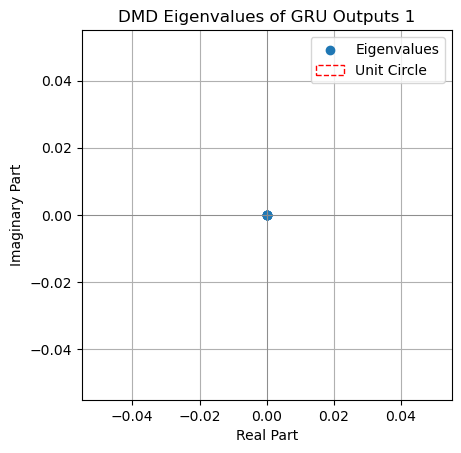

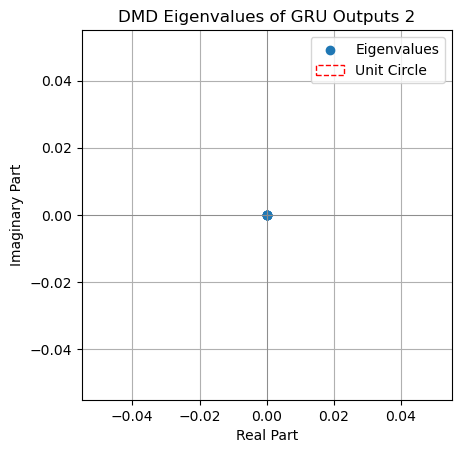

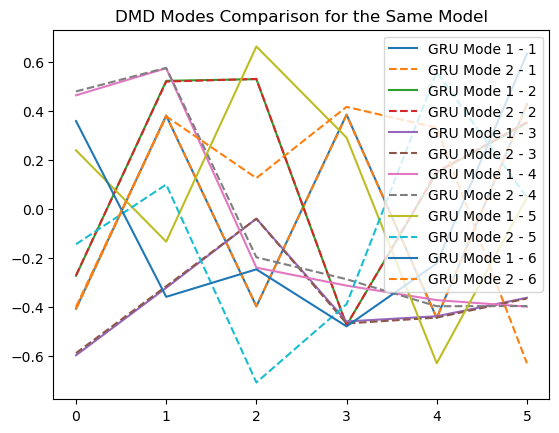

Reconstructed GRU 1 Shape: torch.Size([6, 800])
Reconstructed GRU 2 Shape: torch.Size([6, 800])


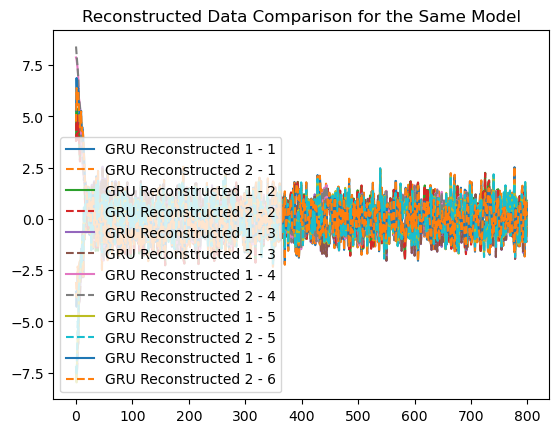

DSA Similarities between GRU Outputs 1 and GRU Outputs 2: 0


In [463]:
# Import necessary libraries
from pydmd import DMD as PyDMD  # Import the DMD class from pydmd
import matplotlib.pyplot as plt
from DSA.dmd import DMD as DSADMD  # Import the DMD class from DSA
from DSA.simdist import SimilarityTransformDist  # Import the SimilarityTransformDist class
import numpy as np
import torch

# Define function to collect model outputs
def collect_model_outputs(model, inputs_torch, device):
    model.to(device)
    model.eval()  # Ensure the model is in evaluation mode
    outputs = []
    with torch.no_grad():
        hidden = model.init_hidden(batch_size=1).to(device)  # Initialize the hidden state
        for time_step in inputs_torch:
            time_step = time_step.to(device)
            if time_step.shape[0] != input_size:
                raise ValueError(f"Input size mismatch: got {time_step.shape[0]}, expected {input_size}")
            if torch.isnan(time_step).any() or torch.isinf(time_step).any():
                continue
            output, hidden = model(time_step.unsqueeze(0), hidden)  # Add batch dimension, pass hidden state
            outputs.append(output.cpu())
    return torch.stack(outputs).numpy() if outputs else np.array([])

# Normalize the collected outputs
def normalize_outputs(outputs):
    mean = np.mean(outputs, axis=0)
    std = np.std(outputs, axis=0)
    return (outputs - mean) / std


# Function to compute DMD eigenvalues from SVD components
def compute_dmd_eigenvalues(U, S,V, A_v):
    # Construct the low-rank DMD matrix A_tilde
    S_inv = torch.diag(1 / S)
    A_tilde = U.T @ A_v @ U @ S_inv
    
    # Compute eigenvalues of A_tilde
    eigenvalues = torch.linalg.eigvals(A_tilde)
    return eigenvalues


# Function to plot DMD eigenvalues
def plot_dmd_eigenvalues(dmd, title):
    # Compute the eigenvalues of the A_v matrix
    A_v = dmd.A_v.cpu().numpy()  # Assuming A_v is a PyTorch tensor, convert to numpy array
    eigenvalues = compute_dmd_eigenvalues(dmd.U, dmd.S, dmd.V, dmd.A_v)
    
    plt.figure()
    plt.scatter(eigenvalues.real, eigenvalues.imag, label='Eigenvalues')
    unit_circle = plt.Circle((0, 0), 1, color='r', fill=False, linestyle='--', label='Unit Circle')
    ax = plt.gca()
    ax.add_artist(unit_circle)
    ax.set_aspect('equal', 'box')  # Ensure the aspect ratio is equal
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Prepare the dataloader and collect data
task_datamodule.setup()
dataloader = task_datamodule.train_dataloader()
inputs = []

for batch in dataloader:
    inputs.append(batch[0])  # Assuming that the inputs are in the first element of the batch

inputs_torch = torch.cat(inputs, dim=0)  # Concatenate all batches into a single tensor

# Ensure the input size matches the model's expected input size
total_samples, input_dim = inputs_torch.shape

# Adjust input dimensions to match model's expected input size
if input_dim != input_size:
    padding = input_size - input_dim
    inputs_torch = torch.nn.functional.pad(inputs_torch, (0, padding))

# Collect outputs from the same model twice for testing
gru_outputs1 = collect_model_outputs(gru_rnn_loaded, inputs_torch, device)
gru_outputs2 = collect_model_outputs(gru_rnn_loaded, inputs_torch, device)

# Normalize the outputs
gru_outputs1 = normalize_outputs(gru_outputs1)
gru_outputs2 = normalize_outputs(gru_outputs2)

# Print the shapes and first few values for debugging
print(f"GRU Outputs 1 Shape: {gru_outputs1.shape}, First few values: {gru_outputs1[:5]}")
print(f"GRU Outputs 2 Shape: {gru_outputs2.shape}, First few values: {gru_outputs2[:5]}")

# Perform DMD on the GRU outputs
n_delays = 1  # Reduce the number of delays
rank = 50
dmd_gru1 = DSADMD(gru_outputs1, n_delays=n_delays, rank=rank, delay_interval=1, lamb=1e-5, device='cpu')
dmd_gru1.fit()

dmd_gru2 = DSADMD(gru_outputs2, n_delays=n_delays, rank=rank, delay_interval=1, lamb=1e-5, device='cpu')
dmd_gru2.fit()

# Check DMD attributes to verify A_v and eigenvalues
print("Attributes of dmd_gru1:", dir(dmd_gru1))
print("Attributes of dmd_gru2:", dir(dmd_gru2))

# Plot the DMD eigenvalues comparison
plot_dmd_eigenvalues(dmd_gru1, "DMD Eigenvalues of GRU Outputs 1")
plot_dmd_eigenvalues(dmd_gru2, "DMD Eigenvalues of GRU Outputs 2")

# Extract DMD modes (U matrices from SVD)
def plot_dmd_modes(dmd1, dmd2, title):
    plt.figure()
    modes1 = dmd1.U.cpu().numpy()
    modes2 = dmd2.U.cpu().numpy()
    for i in range(modes1.shape[1]):
        plt.plot(modes1[:, i].real, label=f"GRU Mode 1 - {i+1}")
        plt.plot(modes2[:, i].real, linestyle='dashed', label=f"GRU Mode 2 - {i+1}")
    plt.title(title)
    plt.legend()
    plt.show()

# Compare DMD modes
plot_dmd_modes(dmd_gru1, dmd_gru2, "DMD Modes Comparison for the Same Model")

# Reconstruct data using the DMD
def reconstruct_data(dmd):
    U = dmd.U
    S = torch.diag(dmd.S)
    Vt = dmd.V.cpu().T  # Ensure proper transposition
    return U @ S @ Vt

gru_reconstructed1 = reconstruct_data(dmd_gru1)
gru_reconstructed2 = reconstruct_data(dmd_gru2)

print(f"Reconstructed GRU 1 Shape: {gru_reconstructed1.shape}")
print(f"Reconstructed GRU 2 Shape: {gru_reconstructed2.shape}")

plt.figure()
for i in range(gru_reconstructed1.shape[0]):
    plt.plot(gru_reconstructed1[i, :].real, label=f"GRU Reconstructed 1 - {i+1}")
    plt.plot(gru_reconstructed2[i, :].real, linestyle='dashed', label=f"GRU Reconstructed 2 - {i+1}")

plt.title("Reconstructed Data Comparison for the Same Model")
plt.legend()
plt.show()

# Extract DMD matrices
A_gru1 = dmd_gru1.A_v
A_gru2 = dmd_gru2.A_v

# Compare DMD matrices using SimilarityTransformDist
comparison_dmd = SimilarityTransformDist(device='cpu', iters=2000, lr=1e-3)
score = comparison_dmd.fit_score(A_gru1, A_gru2)

print(f"DSA Similarities between GRU Outputs 1 and GRU Outputs 2: {score}")


In [495]:
import os
import sys
import subprocess
import torch
import numpy as np
from ctd.task_modeling.model.rnn import GRU_RNN, NoisyGRU_RNN, LSTM_RNN  # Assuming LSTM_RNN is available
from ctd.task_modeling.model.node import Node  # Assuming Node is available
from ctd.task_modeling.datamodule.task_datamodule import TaskDataModule
from ctd.task_modeling.task_wrapper.task_wrapper import TaskTrainedWrapper
from pytorch_lightning import Trainer
from ctd.task_modeling.task_env.task_env import RandomTarget
from motornet.effector import RigidTendonArm26
from motornet.muscle import MujocoHillMuscle

# Step 1: Clone the DSA repository
repo_url = "https://github.com/mitchellostrow/DSA"
repo_dir = "./DSA"

if not os.path.exists(repo_dir):
    subprocess.run(["git", "clone", repo_url, repo_dir], check=True)

# Step 2: Install the package in editable mode
subprocess.run([sys.executable, "-m", "pip", "install", "-e", repo_dir], check=True)

# Step 3: Add the package directory to the Python path
dsa_path = os.path.abspath(os.path.join(repo_dir, "dsa"))
if not os.path.exists(dsa_path):
    print(f"The path {dsa_path} does not exist.")
else:
    sys.path.append(dsa_path)
    print(f"The path {dsa_path} added to sys.path.")

# Step 4: Import necessary modules
try:
    from dsa import DSA
    print("DSA module imported successfully.")
except ModuleNotFoundError as e:
    print(f"Error: {e}")

# Use CPU
device = torch.device("cpu")

# Step 1: Instantiate the models
gru_rnn_1 = GRU_RNN(latent_size=128)
gru_rnn_2 = GRU_RNN(latent_size=128)
noisy_gru_rnn = NoisyGRU_RNN(latent_size=128)
lstm_rnn = LSTM_RNN(latent_size=128)
node = Node(input_size=128, output_size=128, hidden_layers=[128])  # Adjust input_size and output_size as necessary

# Step 2: Instantiate the task environment
task_env = RandomTarget(effector=RigidTendonArm26(muscle=MujocoHillMuscle()))

# Step 3: Instantiate the task datamodule
task_datamodule = TaskDataModule(task_env, n_samples=1000, batch_size=256)

# Step 4: Instantiate the task wrappers
task_wrapper_gru_1 = TaskTrainedWrapper(learning_rate=1e-3, weight_decay=1e-8)
task_wrapper_gru_2 = TaskTrainedWrapper(learning_rate=1e-3, weight_decay=1e-8)
task_wrapper_noisy_gru = TaskTrainedWrapper(learning_rate=1e-3, weight_decay=1e-8)
task_wrapper_lstm = TaskTrainedWrapper(learning_rate=1e-3, weight_decay=1e-8)
task_wrapper_node = TaskTrainedWrapper(learning_rate=1e-3, weight_decay=1e-8)

# Step 5: Initialize the models with the input and output sizes
input_size = task_env.observation_space.shape[0] + task_env.context_inputs.shape[0]
output_size = task_env.action_space.shape[0]

print(f"Expected input size: {input_size}, Expected output size: {output_size}")

gru_rnn_1.init_model(input_size=input_size, output_size=output_size)
gru_rnn_2.init_model(input_size=input_size, output_size=output_size)
noisy_gru_rnn.init_model(input_size=input_size, output_size=output_size)
lstm_rnn.init_model(input_size=input_size, output_size=output_size)
node.init_model(input_size=input_size, output_size=output_size)

# Step 6: Set the environment and models in the task wrappers
task_wrapper_gru_1.set_environment(task_env)
task_wrapper_gru_1.set_model(gru_rnn_1)

task_wrapper_gru_2.set_environment(task_env)
task_wrapper_gru_2.set_model(gru_rnn_2)

task_wrapper_noisy_gru.set_environment(task_env)
task_wrapper_noisy_gru.set_model(noisy_gru_rnn)

task_wrapper_lstm.set_environment(task_env)
task_wrapper_lstm.set_model(lstm_rnn)

task_wrapper_node.set_environment(task_env)
task_wrapper_node.set_model(node)

# Step 7: Define the PyTorch Lightning Trainer object
trainer = Trainer(accelerator="cpu", max_epochs=500, enable_progress_bar=False)

# Step 8: Fit the models
trainer.fit(task_wrapper_gru_1, task_datamodule)
trainer.fit(task_wrapper_gru_2, task_datamodule)
trainer.fit(task_wrapper_noisy_gru, task_datamodule)
trainer.fit(task_wrapper_lstm, task_datamodule)
trainer.fit(task_wrapper_node, task_datamodule)

# Step 9: Save the models using pickle
model_save_path = './models'
os.makedirs(model_save_path, exist_ok=True)

torch.save(gru_rnn_1.state_dict(), os.path.join(model_save_path, 'gru_rnn_1.pth'))
torch.save(gru_rnn_2.state_dict(), os.path.join(model_save_path, 'gru_rnn_2.pth'))
torch.save(noisy_gru_rnn.state_dict(), os.path.join(model_save_path, 'noisy_gru_rnn.pth'))
torch.save(lstm_rnn.state_dict(), os.path.join(model_save_path, 'lstm_rnn.pth'))
torch.save(node.state_dict(), os.path.join(model_save_path, 'node.pth'))

# Step 10: Perform comparisons using DMD
from DSA.dmd import DMD as DSADMD  # Ensure this import is done here if not earlier
from DSA.simdist import SimilarityTransformDist  # Ensure this import is done here if not earlier

# Function to collect model outputs
def collect_model_outputs(model, inputs_torch, device):
    model.to(device)
    model.eval()  # Ensure the model is in evaluation mode
    outputs = []
    with torch.no_grad():
        hidden = model.init_hidden(batch_size=1).to(device)  # Initialize the hidden state
        for time_step in inputs_torch:
            time_step = time_step.to(device)
            if time_step.shape[0] != input_size:
                raise ValueError(f"Input size mismatch: got {time_step.shape[0]}, expected {input_size}")
            if torch.isnan(time_step).any() or torch.isinf(time_step).any():
                continue
            output, hidden = model(time_step.unsqueeze(0), hidden)  # Add batch dimension, pass hidden state
            outputs.append(output.cpu())
    return torch.stack(outputs).numpy() if outputs else np.array([])

# Function to normalize the outputs
def normalize_outputs(outputs):
    mean = np.mean(outputs, axis=0)
    std = np.std(outputs, axis=0)
    return (outputs - mean) / std

# Collect data for comparison
task_datamodule.setup()
dataloader = task_datamodule.train_dataloader()
inputs = []

for batch in dataloader:
    inputs.append(batch[0])  # Assuming that the inputs are in the first element of the batch

inputs_torch = torch.cat(inputs, dim=0)  # Concatenate all batches into a single tensor

# Ensure the input size matches the model's expected input size
total_samples, input_dim = inputs_torch.shape

# Adjust input dimensions to match model's expected input size
if input_dim != input_size:
    padding = input_size - input_dim
    inputs_torch = torch.nn.functional.pad(inputs_torch, (0, padding))

# Collect and normalize outputs from the models
gru_outputs1 = normalize_outputs(collect_model_outputs(gru_rnn_1, inputs_torch, device))
gru_outputs2 = normalize_outputs(collect_model_outputs(gru_rnn_2, inputs_torch, device))
noisy_gru_outputs = normalize_outputs(collect_model_outputs(noisy_gru_rnn, inputs_torch, device))
lstm_outputs = normalize_outputs(collect_model_outputs(lstm_rnn, inputs_torch, device))
node_outputs = normalize_outputs(collect_model_outputs(node, inputs_torch, device))

# Perform DMD on the collected outputs
n_delays = 1  # Adjust as necessary
rank = 50

dmd_gru1 = DSADMD(gru_outputs1, n_delays=n_delays, rank=rank, delay_interval=1, lamb=1e-5, device='cpu')
dmd_gru1.fit()

dmd_gru2 = DSADMD(gru_outputs2, n_delays=n_delays, rank=rank, delay_interval=1, lamb=1e-5, device='cpu')
dmd_gru2.fit()

dmd_noisy_gru = DSADMD(noisy_gru_outputs, n_delays=n_delays, rank=rank, delay_interval=1, lamb=1e-5, device='cpu')
dmd_noisy_gru.fit()

dmd_lstm = DSADMD(lstm_outputs, n_delays=n_delays, rank=rank, delay_interval=1, lamb=1e-5, device='cpu')
dmd_lstm.fit()

dmd_node = DSADMD(node_outputs, n_delays=n_delays, rank=rank, delay_interval=1, lamb=1e-5, device='cpu')
dmd_node.fit()

# Function to compute and plot DMD eigenvalues
def plot_dmd_eigenvalues(dmd, title):
    A_v = dmd.A_v.cpu().numpy()  # Assuming A_v is a PyTorch tensor, convert to numpy array
    eigenvalues = np.linalg.eigvals(A_v)
    
    plt.figure()
    plt.scatter(eigenvalues.real, eigenvalues.imag, label='Eigenvalues')
    unit_circle = plt.Circle((0, 0), 1, color='r', fill=False, linestyle='--', label='Unit Circle')
    ax = plt.gca()
    ax.add_artist(unit_circle)
    ax.set_aspect('equal', 'box')  # Ensure the aspect ratio is equal
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Plot the DMD eigenvalues comparison
plot_dmd_eigenvalues(dmd_gru1, "DMD Eigenvalues of GRU Outputs 1")
plot_dmd_eigenvalues(dmd_gru2, "DMD Eigenvalues of GRU Outputs 2")
plot_dmd_eigenvalues(dmd_noisy_gru, "DMD Eigenvalues of Noisy GRU Outputs")
plot_dmd_eigenvalues(dmd_lstm, "DMD Eigenvalues of LSTM Outputs")
plot_dmd_eigenvalues(dmd_node, "DMD Eigenvalues of Node Outputs")

# Compare DMD matrices using SimilarityTransformDist
comparison_dmd = SimilarityTransformDist(device='cpu', iters=2000, lr=1e-3)

def compare_dmd_matrices(dmd1, dmd2, description):
    score = comparison_dmd.fit_score(dmd1.A_v, dmd2.A_v)
    print(f"DSA Similarities {description}: {score}")

compare_dmd_matrices(dmd_gru1, dmd_gru1, "between GRU Outputs 1 and GRU Outputs 1")
compare_dmd_matrices(dmd_gru1, dmd_gru2, "between GRU Outputs 1 and GRU Outputs 2")
compare_dmd_matrices(dmd_gru1, dmd_noisy_gru, "between GRU Outputs 1 and Noisy GRU Outputs")
compare_dmd_matrices(dmd_gru1, dmd_lstm, "between GRU Outputs 1 and LSTM Outputs")
compare_dmd_matrices(dmd_gru1, dmd_node, "between GRU Outputs 1 and Node Outputs")


ImportError: cannot import name 'LSTM_RNN' from 'ctd.task_modeling.model.rnn' (/Users/nanaasante/Downloads/Neuromatch/ComputationThruDynamicsBenchmark/ctd/task_modeling/model/rnn.py)

Obtaining file:///Users/nanaasante/Downloads/Neuromatch/DSA
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: DSA
    Found existing installation: DSA 1.0.1
    Uninstalling DSA-1.0.1:
      Successfully uninstalled DSA-1.0.1
  Running setup.py develop for DSA


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name     | Type         | Params
------------------------------------------
0 | task_env | RandomTarget | 84    
1 | model    | GRU_RNN      | 57.4 K
------------------------------------------
57.4 K    Trainable params
84        Non-trainable params
57.4 K    Total params
0.230     Total estimated model params size (MB)


The path /Users/nanaasante/Downloads/Neuromatch/DSA/dsa added to sys.path.
Error: No module named 'dsa.simdist'; 'dsa' is not a package
Expected input size: 17, Expected output size: 6


[x2num.py:14 -            check_nan() ] NaN or Inf found in input tensor.
`Trainer.fit` stopped: `max_epochs=1` reached.
/opt/anaconda3/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:639: Checkpoint directory /Users/nanaasante/Downloads/Neuromatch/lightning_logs/version_63/checkpoints exists and is not empty.

  | Name     | Type         | Params
------------------------------------------
0 | task_env | RandomTarget | 84    
1 | model    | GRU_RNN      | 57.4 K
------------------------------------------
57.4 K    Trainable params
84        Non-trainable params
57.4 K    Total params
0.230     Total estimated model params size (MB)
`Trainer.fit` stopped: `max_epochs=1` reached.

  | Name     | Type         | Params
------------------------------------------
0 | task_env | RandomTarget | 84    
1 | model    | NoisyGRU_RNN | 57.4 K
------------------------------------------
57.4 K    Trainable params
84        Non-trainable params
57.4 K    Total params
0.230

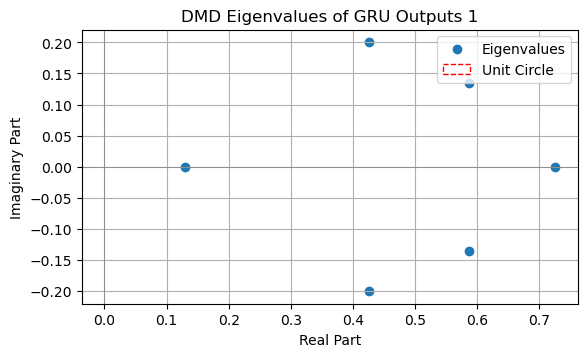

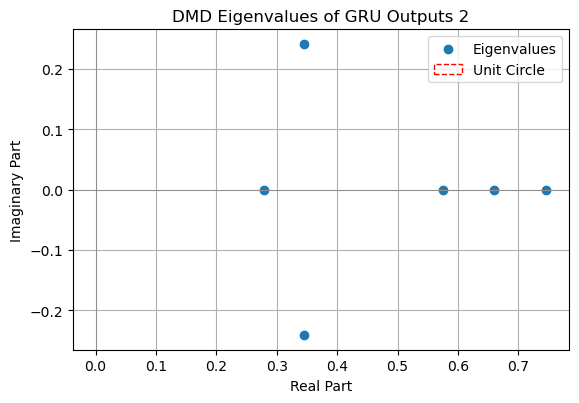

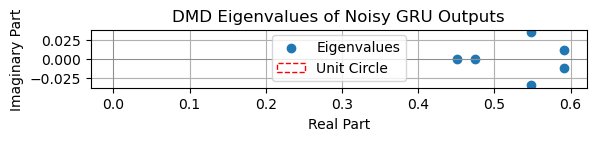

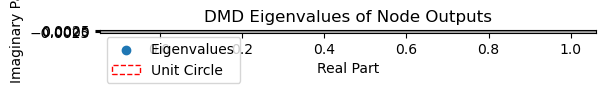

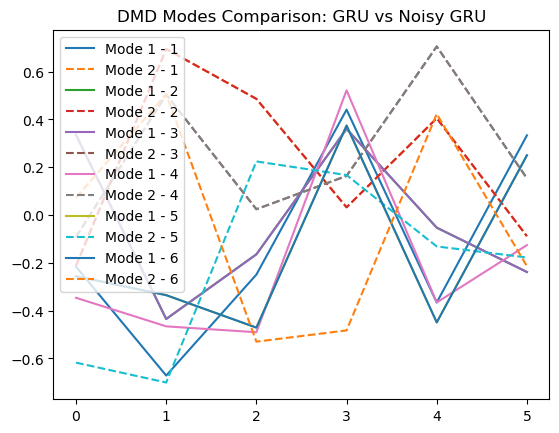

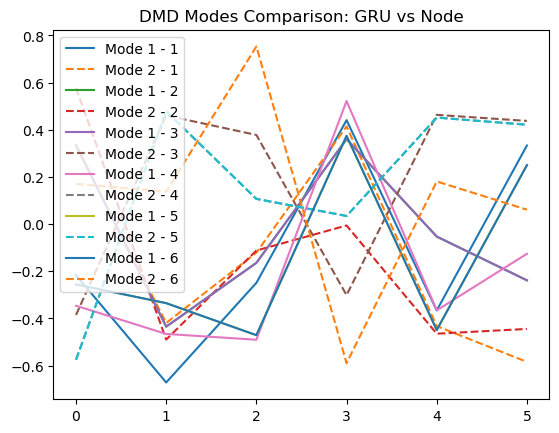

DSA Similarity between GRU and Noisy GRU: 0.475935697555542
DSA Similarity between GRU and Node: 0.4028354585170746


In [509]:
import os
import sys
import subprocess
import torch
import numpy as np
import matplotlib.pyplot as plt
from pytorch_lightning import Trainer
from ctd.task_modeling.model.rnn import GRU_RNN, NoisyGRU_RNN  # Import GRU_RNN and NoisyGRU_RNN
# from ctd.task_modeling.model.lstm import LSTM_RNN  # Placeholder for LSTM model
# from ctd.task_modeling.model.node import NeuralODE  # Placeholder for NeuralODE model
from ctd.task_modeling.model.node import NODE  # Assuming Node is available
from ctd.task_modeling.datamodule.task_datamodule import TaskDataModule
from ctd.task_modeling.task_wrapper.task_wrapper import TaskTrainedWrapper
from ctd.task_modeling.task_env.task_env import RandomTarget
from motornet.effector import RigidTendonArm26
from motornet.muscle import MujocoHillMuscle
from pydmd import DMD  # Import the DMD class

# Step 1: Clone the DSA repository
repo_url = "https://github.com/mitchellostrow/DSA"
repo_dir = "./DSA"

if not os.path.exists(repo_dir):
    subprocess.run(["git", "clone", repo_url, repo_dir], check=True)

# Step 2: Install the package in editable mode
subprocess.run([sys.executable, "-m", "pip", "install", "-e", repo_dir], check=True)

# Step 3: Add the package directory to the Python path
dsa_path = os.path.abspath(os.path.join(repo_dir, "dsa"))
if not os.path.exists(dsa_path):
    print(f"The path {dsa_path} does not exist.")
else:
    sys.path.append(dsa_path)
    print(f"The path {dsa_path} added to sys.path.")

# Step 4: Import necessary modules
try:
    from dsa import DSA
    from dsa.simdist import SimilarityTransformDist
    print("DSA module imported successfully.")
except ModuleNotFoundError as e:
    print(f"Error: {e}")

# Use CPU
device = torch.device("cpu")

# Step 1: Instantiate the models
gru_rnn_1 = GRU_RNN(latent_size=128)
gru_rnn_2 = GRU_RNN(latent_size=128)
noisy_gru_rnn = NoisyGRU_RNN(latent_size=128)
# lstm_rnn = LSTM_RNN(latent_size=128)  # Placeholder for LSTM model
# neural_ode = NeuralODE(latent_size=128)  # Placeholder for NeuralODE model
node = NODE(latent_size = 3, num_layers = 3, layer_hidden_size=128) 

# Step 2: Instantiate the task environment
task_env = RandomTarget(effector=RigidTendonArm26(muscle=MujocoHillMuscle()))

# Step 3: Instantiate the task datamodule
task_datamodule = TaskDataModule(task_env, n_samples=1000, batch_size=256)

# Step 4: Instantiate the task wrappers
task_wrapper_gru_1 = TaskTrainedWrapper(learning_rate=1e-3, weight_decay=1e-8)
task_wrapper_gru_2 = TaskTrainedWrapper(learning_rate=1e-3, weight_decay=1e-8)
task_wrapper_noisy_gru = TaskTrainedWrapper(learning_rate=1e-3, weight_decay=1e-8)
# task_wrapper_lstm = TaskTrainedWrapper(learning_rate=1e-3, weight_decay=1e-8)  # Placeholder
# task_wrapper_neural_ode = TaskTrainedWrapper(learning_rate=1e-3, weight_decay=1e-8)  # Placeholder
task_wrapper_node = TaskTrainedWrapper(learning_rate=1e-3, weight_decay=1e-8)

# Step 5: Initialize the models with the input and output sizes
input_size = task_env.observation_space.shape[0] + task_env.context_inputs.shape[0]
output_size = task_env.action_space.shape[0]

print(f"Expected input size: {input_size}, Expected output size: {output_size}")

gru_rnn_1.init_model(input_size=input_size, output_size=output_size)
gru_rnn_2.init_model(input_size=input_size, output_size=output_size)
noisy_gru_rnn.init_model(input_size=input_size, output_size=output_size)
# lstm_rnn.init_model(input_size=input_size, output_size=output_size)  # Placeholder
# neural_ode.init_model(input_size=input_size, output_size=output_size)  # Placeholder
node.init_model(input_size=input_size, output_size=output_size)

# Step 6: Set the environment and models in the task wrappers
task_wrapper_gru_1.set_environment(task_env)
task_wrapper_gru_1.set_model(gru_rnn_1)

task_wrapper_gru_2.set_environment(task_env)
task_wrapper_gru_2.set_model(gru_rnn_2)

task_wrapper_noisy_gru.set_environment(task_env)
task_wrapper_noisy_gru.set_model(noisy_gru_rnn)

# task_wrapper_lstm.set_environment(task_env)  # Placeholder
# task_wrapper_lstm.set_model(lstm_rnn)  # Placeholder

# task_wrapper_neural_ode.set_environment(task_env)  # Placeholder
# task_wrapper_neural_ode.set_model(neural_ode)  # Placeholder

task_wrapper_node.set_environment(task_env)
task_wrapper_node.set_model(node)

# Step 7: Define the PyTorch Lightning Trainer object
trainer = Trainer(accelerator="cpu", max_epochs=1, enable_progress_bar=False)

# Step 8: Fit the models
trainer.fit(task_wrapper_gru_1, task_datamodule)
trainer.fit(task_wrapper_gru_2, task_datamodule)
trainer.fit(task_wrapper_noisy_gru, task_datamodule)
# trainer.fit(task_wrapper_lstm, task_datamodule)  # Placeholder
# trainer.fit(task_wrapper_neural_ode, task_datamodule)  # Placeholder
trainer.fit(task_wrapper_node, task_datamodule)

# Step 9: Save the models using pickle
model_save_path = './models'
os.makedirs(model_save_path, exist_ok=True)

torch.save(gru_rnn_1.state_dict(), os.path.join(model_save_path, 'gru_rnn_1.pth'))
torch.save(gru_rnn_2.state_dict(), os.path.join(model_save_path, 'gru_rnn_2.pth'))
torch.save(noisy_gru_rnn.state_dict(), os.path.join(model_save_path, 'noisy_gru_rnn.pth'))
# torch.save(lstm_rnn.state_dict(), os.path.join(model_save_path, 'lstm_rnn.pth'))  # Placeholder
# torch.save(neural_ode.state_dict(), os.path.join(model_save_path, 'neural_ode.pth'))  # Placeholder
torch.save(node.state_dict(), os.path.join(model_save_path, 'node.pth'))

# Function to collect model outputs
def collect_model_outputs(model, inputs_torch, device):
    model.to(device)
    model.eval()  # Ensure the model is in evaluation mode
    outputs = []
    with torch.no_grad():
        hidden = model.init_hidden(batch_size=1).to(device)  # Initialize the hidden state
        for time_step in inputs_torch:
            time_step = time_step.to(device)
            if time_step.shape[0] != input_size:
                raise ValueError(f"Input size mismatch: got {time_step.shape[0]}, expected {input_size}")
            if torch.isnan(time_step).any() or torch.isinf(time_step).any():
                continue
            output, hidden = model(time_step.unsqueeze(0), hidden)  # Add batch dimension, pass hidden state
            outputs.append(output.cpu())
    return torch.stack(outputs).numpy() if outputs else np.array([])

# Normalize the collected outputs
def normalize_outputs(outputs):
    mean = np.mean(outputs, axis=0)
    std = np.std(outputs, axis=0)
    return (outputs - mean) / std

# Custom function to plot DMD eigenvalues
def plot_dmd_eigenvalues(dmd, title):
    plt.figure()
    eigenvalues = dmd.eigs
    plt.scatter(eigenvalues.real, eigenvalues.imag, label='Eigenvalues')
    unit_circle = plt.Circle((0, 0), 1, color='r', fill=False, linestyle='--', label='Unit Circle')
    ax = plt.gca()
    ax.add_artist(unit_circle)
    ax.set_aspect('equal', 'box')  # Ensure the aspect ratio is equal
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Prepare the dataloader and collect data
task_datamodule.setup()
dataloader = task_datamodule.train_dataloader()
inputs = []

for batch in dataloader:
    inputs.append(batch[0])  # Assuming that the inputs are in the first element of the batch

inputs_torch = torch.cat(inputs, dim=0)  # Concatenate all batches into a single tensor

# Ensure the input size matches the model's expected input size
total_samples, input_dim = inputs_torch.shape

# Adjust input dimensions to match model's expected input size
if input_dim != input_size:
    padding = input_size - input_dim
    inputs_torch = torch.nn.functional.pad(inputs_torch, (0, padding))

# Collect outputs from the models
gru_outputs1 = collect_model_outputs(gru_rnn_1, inputs_torch, device)
gru_outputs2 = collect_model_outputs(gru_rnn_2, inputs_torch, device)
noisy_gru_outputs = collect_model_outputs(noisy_gru_rnn, inputs_torch, device)
# lstm_outputs = collect_model_outputs(lstm_rnn, inputs_torch, device)  # Placeholder
# neural_ode_outputs = collect_model_outputs(neural_ode, inputs_torch, device)  # Placeholder
node_outputs = collect_model_outputs(node, inputs_torch, device)

# Normalize the outputs
gru_outputs1 = normalize_outputs(gru_outputs1)
gru_outputs2 = normalize_outputs(gru_outputs2)
noisy_gru_outputs = normalize_outputs(noisy_gru_outputs)
# lstm_outputs = normalize_outputs(lstm_outputs)  # Placeholder
# neural_ode_outputs = normalize_outputs(neural_ode_outputs)  # Placeholder
node_outputs = normalize_outputs(node_outputs)

# Perform DMD on the collected outputs
dmd_gru1 = DMD(svd_rank=40)  # Adjust svd_rank
dmd_gru1.fit(gru_outputs1.T)

dmd_gru2 = DMD(svd_rank=40)  # Adjust svd_rank
dmd_gru2.fit(gru_outputs2.T)

dmd_noisy_gru = DMD(svd_rank=40)  # Adjust svd_rank
dmd_noisy_gru.fit(noisy_gru_outputs.T)

# dmd_lstm = DMD(svd_rank=40)  # Adjust svd_rank  # Placeholder
# dmd_lstm.fit(lstm_outputs.T)  # Placeholder

# dmd_neural_ode = DMD(svd_rank=40)  # Adjust svd_rank  # Placeholder
# dmd_neural_ode.fit(neural_ode_outputs.T)  # Placeholder

dmd_node = DMD(svd_rank=40)  # Adjust svd_rank
dmd_node.fit(node_outputs.T)

# Plot the DMD eigenvalues comparison
plot_dmd_eigenvalues(dmd_gru1, "DMD Eigenvalues of GRU Outputs 1")
plot_dmd_eigenvalues(dmd_gru2, "DMD Eigenvalues of GRU Outputs 2")
plot_dmd_eigenvalues(dmd_noisy_gru, "DMD Eigenvalues of Noisy GRU Outputs")
# plot_dmd_eigenvalues(dmd_lstm, "DMD Eigenvalues of LSTM Outputs")  # Placeholder
# plot_dmd_eigenvalues(dmd_neural_ode, "DMD Eigenvalues of NeuralODE Outputs")  # Placeholder
plot_dmd_eigenvalues(dmd_node, "DMD Eigenvalues of Node Outputs")

# Function to compare DMD modes
def compare_dmd_modes(dmd1, dmd2, title):
    plt.figure()
    modes1 = dmd1.modes.T
    modes2 = dmd2.modes.T
    for i, (mode1, mode2) in enumerate(zip(modes1, modes2)):
        plt.plot(mode1.real, label=f"Mode 1 - {i+1}")
        plt.plot(mode2.real, linestyle='dashed', label=f"Mode 2 - {i+1}")
    plt.title(title)
    plt.legend()
    plt.show()

# Compare DMD modes
compare_dmd_modes(dmd_gru1, dmd_noisy_gru, "DMD Modes Comparison: GRU vs Noisy GRU")
# compare_dmd_modes(dmd_gru1, dmd_lstm, "DMD Modes Comparison: GRU vs LSTM")  # Placeholder
# compare_dmd_modes(dmd_gru1, dmd_neural_ode, "DMD Modes Comparison: GRU vs NeuralODE")  # Placeholder
compare_dmd_modes(dmd_gru1, dmd_node, "DMD Modes Comparison: GRU vs Node")

# Function to compare reconstructed data
def compare_reconstructed_data(dmd1, dmd2, title):
    reconstructed1 = dmd1.reconstructed_data.real
    reconstructed2 = dmd2.reconstructed_data.real
    plt.figure()
    for i in range(reconstructed1.shape[0]):
        plt.plot(reconstructed1[i, :], label=f"Reconstructed 1 - {i+1}")
        plt.plot(reconstructed2[i, :], linestyle='dashed', label=f"Reconstructed 2 - {i+1}")
    plt.title(title)
    plt.legend()
    plt.show()



# Perform DSA similarity comparison using the modes matrices from DMD
modes_gru1 = dmd_gru1.modes
modes_gru2 = dmd_gru2.modes
modes_noisy_gru = dmd_noisy_gru.modes
modes_node = dmd_node.modes

# Convert to numpy arrays if necessary
modes_gru1 = modes_gru1.real if isinstance(modes_gru1, torch.Tensor) else modes_gru1
modes_gru2 = modes_gru2.real if isinstance(modes_gru2, torch.Tensor) else modes_gru2
modes_noisy_gru = modes_noisy_gru.real if isinstance(modes_noisy_gru, torch.Tensor) else modes_noisy_gru
modes_node = modes_node.real if isinstance(modes_node, torch.Tensor) else modes_node

# Perform DSA similarity comparison
similarity_gru_noisy_gru = SimilarityTransformDist(device='cpu', iters=2000, lr=1e-3)
score_gru_noisy_gru = similarity_gru_noisy_gru.fit_score(modes_gru1, modes_noisy_gru)
print(f"DSA Similarity between GRU and Noisy GRU: {score_gru_noisy_gru}")

similarity_gru_node = SimilarityTransformDist(device='cpu', iters=2000, lr=1e-3)
score_gru_node = similarity_gru_node.fit_score(modes_gru1, modes_node)
print(f"DSA Similarity between GRU and Node: {score_gru_node}")

Final with PyDMD

In [607]:
import os
import sys
import subprocess
import torch
import numpy as np
import matplotlib.pyplot as plt
from pytorch_lightning import Trainer
from ctd.task_modeling.model.rnn import GRU_RNN, NoisyGRU_RNN  
#from ctd.task_modeling.model.node import LSTM_RNN  # Assuming LSTM_RNN is available
from ctd.task_modeling.model.node import NODE
from ctd.task_modeling.datamodule.task_datamodule import TaskDataModule
from ctd.task_modeling.task_wrapper.task_wrapper import TaskTrainedWrapper
from ctd.task_modeling.task_env.task_env import RandomTarget
from motornet.effector import RigidTendonArm26
from motornet.muscle import MujocoHillMuscle
from pydmd import DMD  # Import the DMD class


# Step 1: Instantiate the models
gru_rnn_1 = GRU_RNN(latent_size=128)
gru_rnn_2 = GRU_RNN(latent_size=128)
noisy_gru_rnn = NoisyGRU_RNN(latent_size=128)
#lstm_rnn = LSTM_RNN(latent_size=128)
node = NODE(latent_size = 128, num_layers = 20, layer_hidden_size=128)  # Adjust input_size and output_size as necessary

# Step 2: Instantiate the task environment
task_env = RandomTarget(effector=RigidTendonArm26(muscle=MujocoHillMuscle()))

# Step 3: Instantiate the task datamodule
task_datamodule = TaskDataModule(task_env, n_samples=1000, batch_size=256)

# Step 4: Instantiate the task wrappers
task_wrapper_gru_1 = TaskTrainedWrapper(learning_rate=1e-3, weight_decay=1e-8)
task_wrapper_gru_2 = TaskTrainedWrapper(learning_rate=1e-3, weight_decay=1e-8)
task_wrapper_noisy_gru = TaskTrainedWrapper(learning_rate=1e-3, weight_decay=1e-8)
#task_wrapper_lstm = TaskTrainedWrapper(learning_rate=1e-3, weight_decay=1e-8)
task_wrapper_node = TaskTrainedWrapper(learning_rate=1e-3, weight_decay=1e-8)

# Step 5: Initialize the models with the input and output sizes
input_size = task_env.observation_space.shape[0] + task_env.context_inputs.shape[0]
output_size = task_env.action_space.shape[0]

print(f"Expected input size: {input_size}, Expected output size: {output_size}")

gru_rnn_1.init_model(input_size=input_size, output_size=output_size)
gru_rnn_2.init_model(input_size=input_size, output_size=output_size)
noisy_gru_rnn.init_model(input_size=input_size, output_size=output_size)
#lstm_rnn.init_model(input_size=input_size, output_size=output_size)
node.init_model(input_size=input_size, output_size=output_size)

# Step 6: Set the environment and models in the task wrappers
task_wrapper_gru_1.set_environment(task_env)
task_wrapper_gru_1.set_model(gru_rnn_1)

task_wrapper_gru_2.set_environment(task_env)
task_wrapper_gru_2.set_model(gru_rnn_2)

task_wrapper_noisy_gru.set_environment(task_env)
task_wrapper_noisy_gru.set_model(noisy_gru_rnn)

#task_wrapper_lstm.set_environment(task_env)
#task_wrapper_lstm.set_model(lstm_rnn)

task_wrapper_node.set_environment(task_env)
task_wrapper_node.set_model(node)

# Step 7: Define the PyTorch Lightning Trainer object
trainer = Trainer(accelerator="cpu", max_epochs=500, enable_progress_bar=False)

# Step 8: Fit the models
trainer.fit(task_wrapper_gru_1, task_datamodule)
trainer.fit(task_wrapper_gru_2, task_datamodule)
trainer.fit(task_wrapper_noisy_gru, task_datamodule)
#trainer.fit(task_wrapper_lstm, task_datamodule)
trainer.fit(task_wrapper_node, task_datamodule)

# Step 9: Save the models using pickle
model_save_path = './models'
os.makedirs(model_save_path, exist_ok=True)

torch.save(gru_rnn_1.state_dict(), os.path.join(model_save_path, 'gru_rnn_1.pth'))
torch.save(gru_rnn_2.state_dict(), os.path.join(model_save_path, 'gru_rnn_2.pth'))
torch.save(noisy_gru_rnn.state_dict(), os.path.join(model_save_path, 'noisy_gru_rnn.pth'))
#torch.save(lstm_rnn.state_dict(), os.path.join(model_save_path, 'lstm_rnn.pth'))
torch.save(node.state_dict(), os.path.join(model_save_path, 'node.pth'))

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name     | Type         | Params
------------------------------------------
0 | task_env | RandomTarget | 84    
1 | model    | GRU_RNN      | 57.4 K
------------------------------------------
57.4 K    Trainable params
84        Non-trainable params
57.4 K    Total params
0.230     Total estimated model params size (MB)


Expected input size: 17, Expected output size: 6


[x2num.py:14 -            check_nan() ] NaN or Inf found in input tensor.
`Trainer.fit` stopped: `max_epochs=500` reached.
/opt/anaconda3/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:639: Checkpoint directory /Users/nanaasante/Downloads/Neuromatch/lightning_logs/version_72/checkpoints exists and is not empty.

  | Name     | Type         | Params
------------------------------------------
0 | task_env | RandomTarget | 84    
1 | model    | GRU_RNN      | 57.4 K
------------------------------------------
57.4 K    Trainable params
84        Non-trainable params
57.4 K    Total params
0.230     Total estimated model params size (MB)
`Trainer.fit` stopped: `max_epochs=500` reached.

  | Name     | Type         | Params
------------------------------------------
0 | task_env | RandomTarget | 84    
1 | model    | NoisyGRU_RNN | 57.4 K
------------------------------------------
57.4 K    Trainable params
84        Non-trainable params
57.4 K    Total params
0

In [ ]:
Training for NODE only

In [615]:


# Step 1: Instantiate the models
node = NODE(latent_size = 128, num_layers = 20, layer_hidden_size=128)  # Adjust input_size and output_size as necessary

# Step 2: Instantiate the task environment
task_env = RandomTarget(effector=RigidTendonArm26(muscle=MujocoHillMuscle()))

# Step 3: Instantiate the task datamodule
task_datamodule = TaskDataModule(task_env, n_samples=1000, batch_size=256)

# Step 4: Instantiate the task wrappers
task_wrapper_node = TaskTrainedWrapper(learning_rate=1e-3, weight_decay=1e-8)

# Step 5: Initialize the models with the input and output sizes
input_size = task_env.observation_space.shape[0] + task_env.context_inputs.shape[0]
output_size = task_env.action_space.shape[0]

print(f"Expected input size: {input_size}, Expected output size: {output_size}")

node.init_model(input_size=input_size, output_size=output_size)

# Step 6: Set the environment and models in the task wrappers
task_wrapper_node.set_environment(task_env)
task_wrapper_node.set_model(node)

# Step 7: Define the PyTorch Lightning Trainer object
trainer = Trainer(accelerator="cpu", max_epochs=500, enable_progress_bar=False)

# Step 8: Fit the models
trainer.fit(task_wrapper_node, task_datamodule)

# Step 9: Save the models using pickle
model_save_path = './models'
os.makedirs(model_save_path, exist_ok=True)

torch.save(node.state_dict(), os.path.join(model_save_path, 'node.pth'))

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name     | Type         | Params
------------------------------------------
0 | task_env | RandomTarget | 84    
1 | model    | NODE         | 333 K 
------------------------------------------
333 K     Trainable params
84        Non-trainable params
333 K     Total params
1.334     Total estimated model params size (MB)


Expected input size: 17, Expected output size: 6


[x2num.py:14 -            check_nan() ] NaN or Inf found in input tensor.
`Trainer.fit` stopped: `max_epochs=500` reached.


/opt/anaconda3/lib/python3.12/site-packages/pydmd/snapshots.py:73: UserWarning: Input data condition number 1732269.5. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


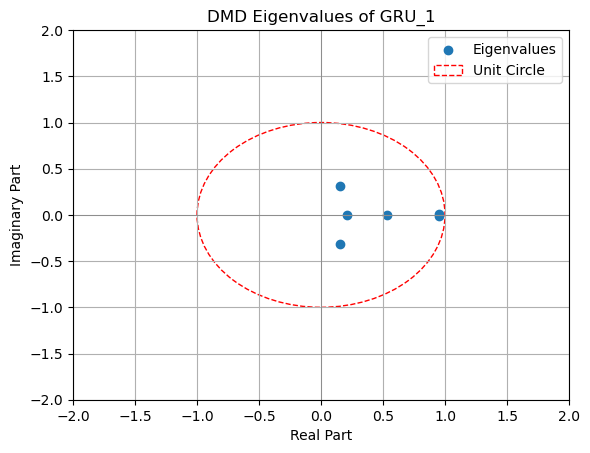

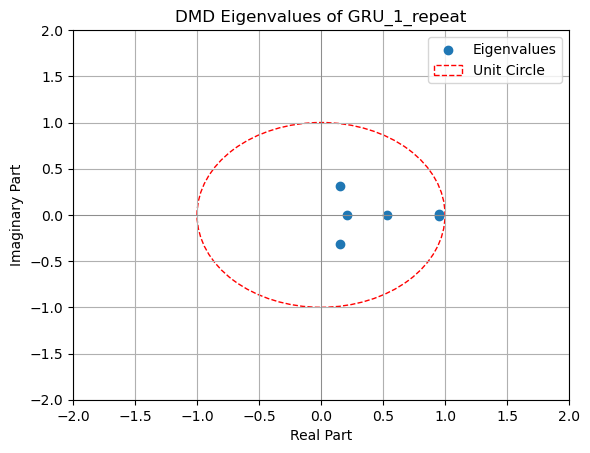

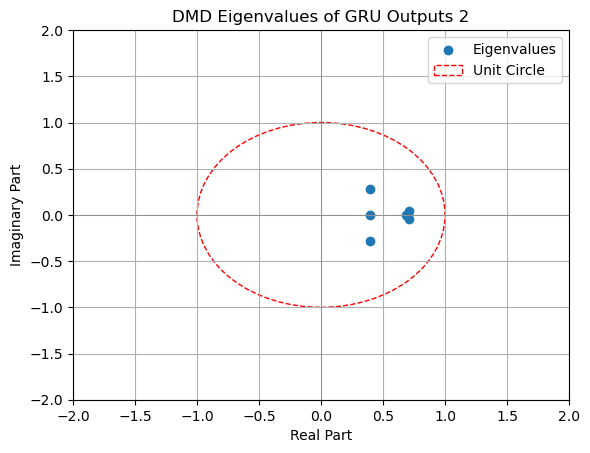

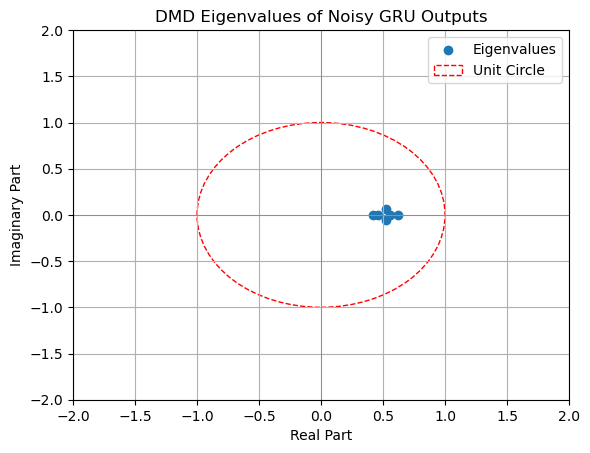

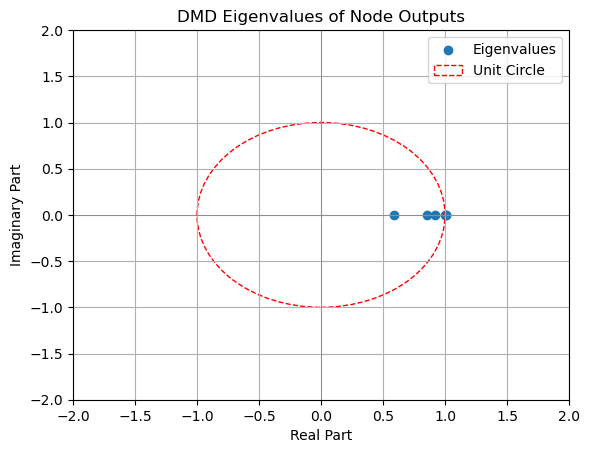

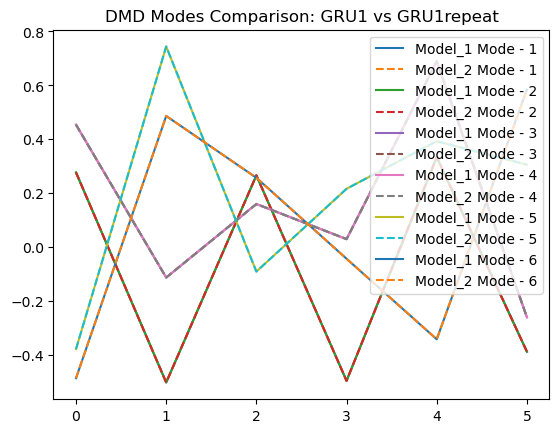

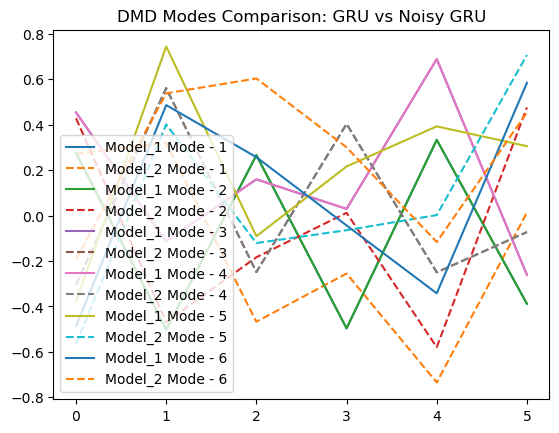

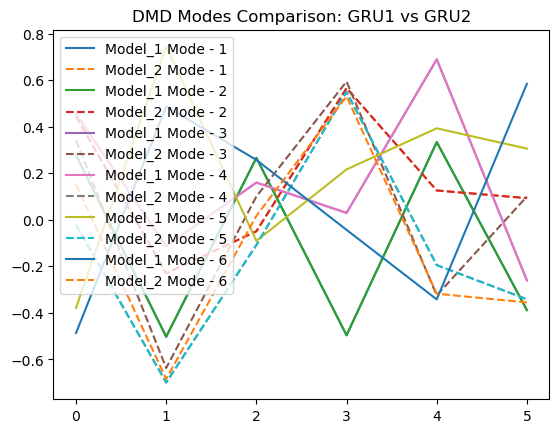

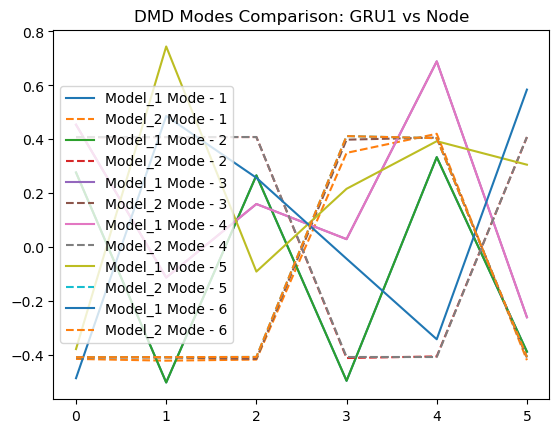

Reconstructed1 shape: (6, 800), first few values: [[-4.17154643 -2.89948674 -2.21514489 -2.19405305 -2.18736731]
 [ 4.30431787  4.26073469  4.51835464  4.55050076  4.34918279]
 [-8.13438875 -6.93561326 -5.86015293 -5.40391762 -5.18623995]
 [ 7.5335172   7.6314866   7.10524414  6.63598149  6.27544144]
 [-8.21287816 -4.84136404 -3.41110669 -3.26290364 -3.22242926]
 [ 5.67214527  4.9445026   4.92264292  4.96583408  4.80920164]]
Reconstructed2 shape: (6, 800), first few values: [[-0.63882187 -0.4575525  -0.32355453 -0.22426503 -0.15235277]
 [-3.33471777 -1.98140371 -1.16982396 -0.68839582 -0.40468517]
 [ 2.54361202  1.60316602  1.00055022  0.62057623  0.38344742]
 [ 0.30145756  0.26091802  0.20591788  0.15356922  0.11017135]
 [ 3.76150206  2.3059761   1.41736425  0.87331628  0.53930067]
 [ 1.05309117  0.52926182  0.27027515  0.13975623  0.07292559]]


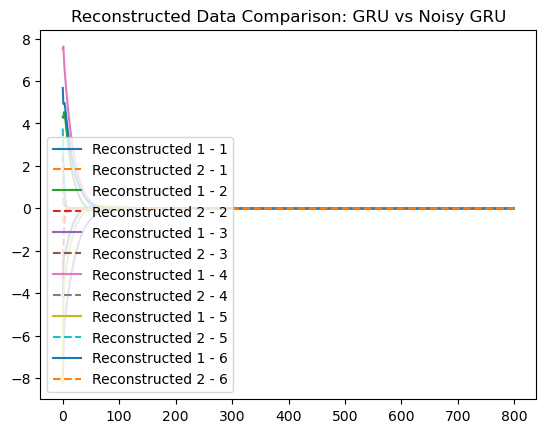

Reconstructed1 shape: (6, 800), first few values: [[-4.17154643 -2.89948674 -2.21514489 -2.19405305 -2.18736731]
 [ 4.30431787  4.26073469  4.51835464  4.55050076  4.34918279]
 [-8.13438875 -6.93561326 -5.86015293 -5.40391762 -5.18623995]
 [ 7.5335172   7.6314866   7.10524414  6.63598149  6.27544144]
 [-8.21287816 -4.84136404 -3.41110669 -3.26290364 -3.22242926]
 [ 5.67214527  4.9445026   4.92264292  4.96583408  4.80920164]]
Reconstructed2 shape: (6, 800), first few values: [[-4.17154643 -2.89948674 -2.21514489 -2.19405305 -2.18736731]
 [ 4.30431787  4.26073469  4.51835464  4.55050076  4.34918279]
 [-8.13438875 -6.93561326 -5.86015293 -5.40391762 -5.18623995]
 [ 7.5335172   7.6314866   7.10524414  6.63598149  6.27544144]
 [-8.21287816 -4.84136404 -3.41110669 -3.26290364 -3.22242926]
 [ 5.67214527  4.9445026   4.92264292  4.96583408  4.80920164]]


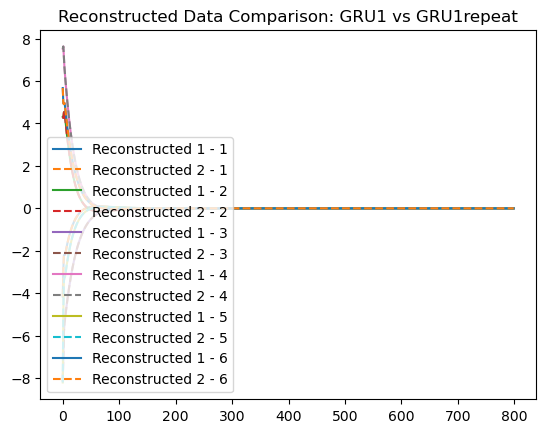

Reconstructed1 shape: (6, 800), first few values: [[-4.17154643 -2.89948674 -2.21514489 -2.19405305 -2.18736731]
 [ 4.30431787  4.26073469  4.51835464  4.55050076  4.34918279]
 [-8.13438875 -6.93561326 -5.86015293 -5.40391762 -5.18623995]
 [ 7.5335172   7.6314866   7.10524414  6.63598149  6.27544144]
 [-8.21287816 -4.84136404 -3.41110669 -3.26290364 -3.22242926]
 [ 5.67214527  4.9445026   4.92264292  4.96583408  4.80920164]]
Reconstructed2 shape: (6, 800), first few values: [[-3.93055946 -3.56032976 -2.88210205 -2.14292274 -1.49894917]
 [ 5.48967705  3.92659149  2.69022183  1.76387391  1.0996353 ]
 [-2.50438421 -2.2637378  -1.75274168 -1.28342174 -0.92945078]
 [-2.23203832 -2.63043657 -2.1544171  -1.47509457 -0.8947031 ]
 [ 6.58020442  5.040618    3.45173745  2.24775688  1.44335571]
 [ 5.60041677  3.59558034  2.21266658  1.33549005  0.8113726 ]]


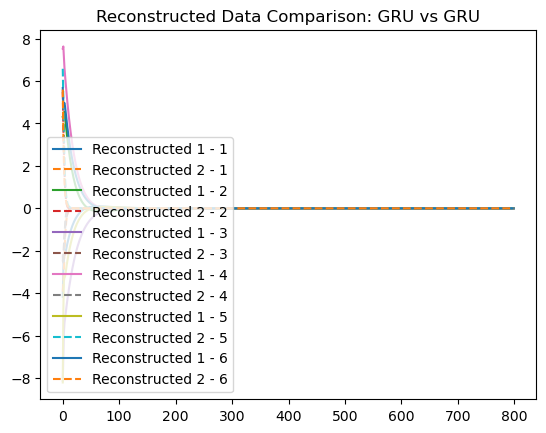

Reconstructed1 shape: (6, 800), first few values: [[-4.17154643 -2.89948674 -2.21514489 -2.19405305 -2.18736731]
 [ 4.30431787  4.26073469  4.51835464  4.55050076  4.34918279]
 [-8.13438875 -6.93561326 -5.86015293 -5.40391762 -5.18623995]
 [ 7.5335172   7.6314866   7.10524414  6.63598149  6.27544144]
 [-8.21287816 -4.84136404 -3.41110669 -3.26290364 -3.22242926]
 [ 5.67214527  4.9445026   4.92264292  4.96583408  4.80920164]]
Reconstructed2 shape: (6, 800), first few values: [[-1.72985059 -1.72935265 -1.72884612 -1.72832775 -1.72779647]
 [-1.72985369 -1.7293554  -1.72884874 -1.72833036 -1.72779916]
 [-1.72989016 -1.7293922  -1.72888574 -1.72836751 -1.72783644]
 [ 1.72907513  1.72858125  1.72807587  1.72755682  1.72702368]
 [ 1.73006099  1.72956562  1.72906193  1.72854658  1.72801847]
 [-1.72990876 -1.72941125 -1.7289053  -1.7283876  -1.72785705]]


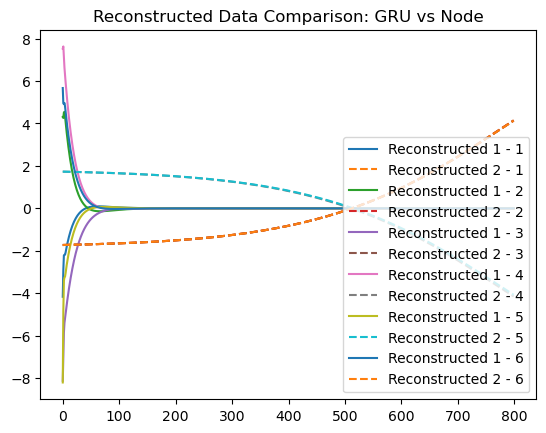

In [617]:
# Step 1: Instantiate the models
gru_rnn_1 = GRU_RNN(latent_size=128)
gru_rnn_2 = GRU_RNN(latent_size=128)
noisy_gru_rnn = NoisyGRU_RNN(latent_size=128)
#lstm_rnn = LSTM_RNN(latent_size=128)
node = NODE(latent_size = 128, num_layers = 20, layer_hidden_size=128)  # Adjust input_size and output_size as necessary


gru_rnn_1.init_model(input_size=input_size, output_size=output_size)
gru_rnn_2.init_model(input_size=input_size, output_size=output_size)
noisy_gru_rnn.init_model(input_size=input_size, output_size=output_size)
#lstm_rnn.init_model(input_size=input_size, output_size=output_size)
node.init_model(input_size=input_size, output_size=output_size)

# Reload the models
gru_rnn_1.load_state_dict(torch.load(os.path.join(model_save_path, 'gru_rnn_1.pth')))
gru_rnn_2.load_state_dict(torch.load(os.path.join(model_save_path, 'gru_rnn_2.pth')))
noisy_gru_rnn.load_state_dict(torch.load(os.path.join(model_save_path, 'noisy_gru_rnn.pth')))
node.load_state_dict(torch.load(os.path.join(model_save_path, 'node.pth')))




# Function to collect model outputs
def collect_model_outputs(model, inputs_torch, device):
    model.to(device)
    model.eval()  # Ensure the model is in evaluation mode
    outputs = []
    with torch.no_grad():
        hidden = model.init_hidden(batch_size=1).to(device)  # Initialize the hidden state
        for time_step in inputs_torch:
            time_step = time_step.to(device)
            if time_step.shape[0] != input_size:
                raise ValueError(f"Input size mismatch: got {time_step.shape[0]}, expected {input_size}")
            if torch.isnan(time_step).any() or torch.isinf(time_step).any():
                continue
            output, hidden = model(time_step.unsqueeze(0), hidden)  # Add batch dimension, pass hidden state
            outputs.append(output.cpu())
    return torch.stack(outputs).numpy() if outputs else np.array([])

# Normalize the collected outputs
def normalize_outputs(outputs):
    mean = np.mean(outputs, axis=0)
    std = np.std(outputs, axis=0)
    return (outputs - mean) / std

# Custom function to plot DMD eigenvalues
def plot_dmd_eigenvalues(dmd, title):
    plt.figure()
    eigenvalues = dmd.eigs
    plt.scatter(eigenvalues.real, eigenvalues.imag, label='Eigenvalues')
    unit_circle = plt.Circle((0, 0), 1, color='r', fill=False, linestyle='--', label='Unit Circle')
    ax = plt.gca()
    ax.add_artist(unit_circle)
    #ax.set_aspect('equal', 'box')  # Ensure the aspect ratio is equal
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Prepare the dataloader and collect data
task_datamodule.setup()
dataloader = task_datamodule.train_dataloader()
inputs = []

for batch in dataloader:
    inputs.append(batch[0])  # Assuming that the inputs are in the first element of the batch

inputs_torch = torch.cat(inputs, dim=0)  # Concatenate all batches into a single tensor

# Ensure the input size matches the model's expected input size
total_samples, input_dim = inputs_torch.shape

# Adjust input dimensions to match model's expected input size
if input_dim != input_size:
    padding = input_size - input_dim
    inputs_torch = torch.nn.functional.pad(inputs_torch, (0, padding))

# Collect outputs from the models
gru_outputs1 = collect_model_outputs(gru_rnn_1, inputs_torch, device)
gru_outputs2 = collect_model_outputs(gru_rnn_2, inputs_torch, device)
noisy_gru_outputs = collect_model_outputs(noisy_gru_rnn, inputs_torch, device)
#lstm_outputs = collect_model_outputs(lstm_rnn, inputs_torch, device)
node_outputs = collect_model_outputs(node, inputs_torch, device)

# Normalize the outputs
gru_outputs1 = normalize_outputs(gru_outputs1)
gru_outputs1repeat = gru_outputs1
gru_outputs2 = normalize_outputs(gru_outputs2)
noisy_gru_outputs = normalize_outputs(noisy_gru_outputs)
#lstm_outputs = normalize_outputs(lstm_outputs)
node_outputs = normalize_outputs(node_outputs)

# Perform DMD on the collected outputs
dmd_gru1 = DMD(svd_rank=40)  # Adjust svd_rank
dmd_gru1.fit(gru_outputs1.T)

dmd_gru1_repeat = DMD(svd_rank=40)  # Adjust svd_rank
dmd_gru1_repeat.fit(gru_outputs1.T)

dmd_gru2 = DMD(svd_rank=40)  # Adjust svd_rank
dmd_gru2.fit(gru_outputs2.T)

dmd_noisy_gru = DMD(svd_rank=40)  # Adjust svd_rank
dmd_noisy_gru.fit(noisy_gru_outputs.T)

#dmd_lstm = DMD(svd_rank=40)  # Adjust svd_rank
#dmd_lstm.fit(lstm_outputs.T)

dmd_node = DMD(svd_rank=40)  # Adjust svd_rank
dmd_node.fit(node_outputs.T)

# Plot the DMD eigenvalues comparison
plot_dmd_eigenvalues(dmd_gru1, "DMD Eigenvalues of GRU_1")
plot_dmd_eigenvalues(dmd_gru1_repeat, "DMD Eigenvalues of GRU_1_repeat")
plot_dmd_eigenvalues(dmd_gru2, "DMD Eigenvalues of GRU Outputs 2")
plot_dmd_eigenvalues(dmd_noisy_gru, "DMD Eigenvalues of Noisy GRU Outputs")
#plot_dmd_eigenvalues(dmd_lstm, "DMD Eigenvalues of LSTM Outputs")
plot_dmd_eigenvalues(dmd_node, "DMD Eigenvalues of Node Outputs")

# Function to compare DMD modes
def compare_dmd_modes(dmd1, dmd2, title):
    plt.figure()
    modes1 = dmd1.modes.T
    modes2 = dmd2.modes.T
    for i, (mode1, mode2) in enumerate(zip(modes1, modes2)):
        plt.plot(mode1.real, label=f"Model_1 Mode - {i+1}")
        plt.plot(mode2.real, linestyle='dashed', label=f"Model_2 Mode - {i+1}")
    plt.title(title)
    plt.legend()
    plt.show()

# Compare DMD modes
compare_dmd_modes(dmd_gru1, dmd_gru1_repeat, "DMD Modes Comparison: GRU1 vs GRU1repeat")
compare_dmd_modes(dmd_gru1, dmd_noisy_gru, "DMD Modes Comparison: GRU vs Noisy GRU")
compare_dmd_modes(dmd_gru1, dmd_gru2, "DMD Modes Comparison: GRU1 vs GRU2")
compare_dmd_modes(dmd_gru1, dmd_node, "DMD Modes Comparison: GRU1 vs Node")


# Function to compare reconstructed data
def compare_reconstructed_data(dmd1, dmd2, title):
    reconstructed1 = dmd1.reconstructed_data.real
    reconstructed2 = dmd2.reconstructed_data.real

    # Print shapes and first few values for verification
    print(f"Reconstructed1 shape: {reconstructed1.shape}, first few values: {reconstructed1[:, :5]}")
    print(f"Reconstructed2 shape: {reconstructed2.shape}, first few values: {reconstructed2[:, :5]}")

    plt.figure()
    for i in range(reconstructed1.shape[0]):
        plt.plot(reconstructed1[i, :], label=f"Reconstructed 1 - {i+1}")
        plt.plot(reconstructed2[i, :], linestyle='dashed', label=f"Reconstructed 2 - {i+1}")
    plt.title(title)
    plt.legend()
    plt.show()


# Compare reconstructed data
compare_reconstructed_data(dmd_gru1, dmd_noisy_gru, "Reconstructed Data Comparison: GRU vs Noisy GRU")
compare_reconstructed_data(dmd_gru1, dmd_gru1_repeat, "Reconstructed Data Comparison: GRU1 vs GRU1repeat")
compare_reconstructed_data(dmd_gru1, dmd_gru2, "Reconstructed Data Comparison: GRU vs GRU")
compare_reconstructed_data(dmd_gru1, dmd_node, "Reconstructed Data Comparison: GRU vs Node")

In [619]:
# Perform DSA similarity comparison using the modes matrices from DMD
modes_gru1 = dmd_gru1.modes
modes_gru1_repeat = dmd_gru1_repeat.modes
modes_gru2 = dmd_gru2.modes
modes_noisy_gru = dmd_noisy_gru.modes
modes_node = dmd_node.modes

# Convert to numpy arrays if necessary
modes_gru1 = modes_gru1.real if isinstance(modes_gru1, torch.Tensor) else modes_gru1
modes_gru1_repeat = modes_gru1_repeat.real if isinstance(modes_gru1_repeat, torch.Tensor) else modes_gru1_repeat
modes_gru2 = modes_gru2.real if isinstance(modes_gru2, torch.Tensor) else modes_gru2
modes_noisy_gru = modes_noisy_gru.real if isinstance(modes_noisy_gru, torch.Tensor) else modes_noisy_gru
modes_node = modes_node.real if isinstance(modes_node, torch.Tensor) else modes_node

# Perform DSA similarity comparison
similarity_gru_noisy_gru = SimilarityTransformDist(device='cpu', iters=2000, lr=1e-3)
score_gru_noisy_gru = similarity_gru_noisy_gru.fit_score(modes_gru1, modes_noisy_gru)
print(f"DSA Similarity between GRU and Noisy GRU: {score_gru_noisy_gru}")

similarity_gru_node = SimilarityTransformDist(device='cpu', iters=2000, lr=1e-3)
score_gru_node = similarity_gru_node.fit_score(modes_gru1, modes_node)
print(f"DSA Similarity between GRU and Node: {score_gru_node}")

similarity_gru_node = SimilarityTransformDist(device='cpu', iters=2000, lr=1e-3)
score_gru_gru = similarity_gru_node.fit_score(modes_gru1, modes_gru2)
print(f"DSA Similarity between GRU and GRU: {score_gru_gru}")

similarity_gru_node = SimilarityTransformDist(device='cpu', iters=2000, lr=1e-3)
score_gru1_gru1repeat = similarity_gru_node.fit_score(modes_gru1, modes_gru1_repeat)
print(f"DSA Similarity between GRU and GRU1repeat: {score_gru1_gru1repeat}")

DSA Similarity between GRU and Noisy GRU: 0.5837317705154419
DSA Similarity between GRU and Node: 0.6220000982284546
DSA Similarity between GRU and GRU: 0.4437195360660553
DSA Similarity between GRU and GRU1repeat: 0


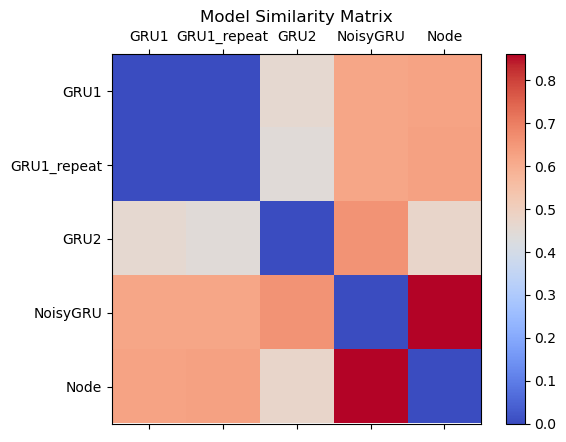

In [621]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Function to compute similarity scores between models
def compute_similarity_scores(models):
    num_models = len(models)
    similarity_matrix = np.zeros((num_models, num_models))
    similarity_transform = SimilarityTransformDist(device='cpu', iters=2000, lr=1e-3)

    for i in range(num_models):
        for j in range(i, num_models):
            score = similarity_transform.fit_score(models[i].modes.real, models[j].modes.real)
            similarity_matrix[i, j] = score
            similarity_matrix[j, i] = score  # Symmetric matrix
    return similarity_matrix

# List of DMD models
dmd_models = [dmd_gru1, dmd_gru1_repeat, dmd_gru2, dmd_noisy_gru, dmd_node]

# Compute similarity scores
similarity_matrix = compute_similarity_scores(dmd_models)

# Function to update the animation
def update(frame, similarity_matrix, mat):
    mat.set_data(similarity_matrix)
    return [mat]

# Create figure and axis
fig, ax = plt.subplots()
mat = ax.matshow(similarity_matrix, cmap='coolwarm')

# Add color bar
plt.colorbar(mat)

# Add labels and titles
ax.set_xticks(np.arange(len(dmd_models)))
ax.set_yticks(np.arange(len(dmd_models)))
ax.set_xticklabels(['GRU1', 'GRU1_repeat', 'GRU2', 'NoisyGRU', 'Node'])
ax.set_yticklabels(['GRU1', 'GRU1_repeat', 'GRU2', 'NoisyGRU', 'Node'])
plt.title("Model Similarity Matrix")

# Create animation
ani = animation.FuncAnimation(fig, update, frames=10, fargs=(similarity_matrix, mat), blit=True)

# Show animation
plt.show()
